# 신용 리스크

신용 위험은 간단히 서술하면 거래 상대방이 합의된 조건에 따른 의무를 수행하지 못할 가능성으로 정의된다. 일반적으로 신용 위험에는 세 가지 정의상의 특징이 존재한다.

1. 노출 : 노출이란 채무불이행이나 채무이행 능력에 불리한 변화를 겪을 수 있는 당사자를 의미힌다.

2. 우도 : 우도는 당사자가 의무를 불이행할 확률을 의미한다

3. 회수율 : 채무불이행이 발생하는 경우 회수할 수 있는 양을 의미한다.

IRB(International Ratings Bsed Approach), 내부등급법은 바젤은행감독위원회가 정하고 있는 최소요건을 충족하여 감독당국의 승인을 받은 은행이 자체 추정한 리스크 측정요소를 활용하여 신용리스크에 대한 위험가중자산을 산출하는 방법을 의미한다. 이 내부 평가의 주요 변수는 다음과 같다.

$$예상 손실 = EAD * LGD * PD$$

여기서 PD는 채무불이행 확률, LGD는 0과 1 사이의 값을 가지는 채무불이행 시 예상손실, EAD는 채무불이행 시 노출을 의미한다.

이 식에서 가장 중요하며, 또한 어려운 문제가 바로 채무불이행 확률, PD를 산출하는 것이다. 이를 위해 적합한 머신러닝 방법론을 알아보는 것이 6장의 목표이다.

## 위험 버켓팅

위험 버켓팅은 신용도가 유사한 차용인들끼리 그룹화하는 것을 의미한다. 이는 신용 위험을 더 잘 추정할 수 있도록 동질적인 그룹 또는 클러스터를 얻자는 의미이기도 하다. 위험도에 따라 사용자를 여러 그룹으로 나눈다면 데이터의 특성을 더 잘 포착할 수 있게 되어 더 정확한 예측이 가능해진다.

군집화 방법에는 다양한 방법이 존재한다. 가장 대표적인 방법 중 하나가 바로 K-means Clustering이다.

### K-means Clustering

<center><img src = "https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif" alt="My Image"></center>

Clustering에서 가장 유명한 비지도 학습 알고리즘 중 하나로, 원래 신호 처리 분야에서 나온 벡터 양자화 방법의 일종이다. n개의 관측값을 각 관측값이 가장 가까운 평균(국지적 평균)을 가진 클러스터에 속하는 k개의 클러스터로 분할하여 클러스터의 프로토타입 역할을 하는 것을 목표로 한다

K-Means Clustering에서 목적함수는 PCA와 같이 feature간의 분산을 작게 하는 것으로 지정되어 있지만 거리 척도는 Normal **Euclidean distance가 아니라는 점**을 알아둬야 한다

```
sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, 
                       tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
```

관측 행렬 $(\mathbf{x}_1, \mathbf{x}_2, ..., \mathbf{x}_n)$가 존재한다고 하자. 여기서 각 관측 벡터는 d차원 실수 벡터이다. k means clustering은 군집 내 분산을 최소화하기 위해 관측치를 $k( \geq n)$집합 $\mathbf{S} = \{S_1, S_2, \dots, S_k\}$로 분할하는 것을 목표로 한다

따라서, 목적함수는 다음과 같이 정의된다

$${\displaystyle \mathop {\operatorname {arg\,min} } _{\mathbf {S} }\sum _{i=1}^{k}\sum _{\mathbf {x} \in S_{i}}\left\|\mathbf {x} -{\boldsymbol {\mu }}_{i}\right\|^{2}=\mathop {\operatorname {arg\,min} } _{\mathbf {S} }\sum _{i=1}^{k}|S_{i}|\operatorname {Var} S_{i}}$$

여기서 $\mathbf{\mu}_i$는 군집 집합 $S_i$의 국소적 평균으로, 다음과 같이 정의된다

$${\displaystyle {\boldsymbol {\mu _{i}}}={\frac {1}{|S_{i}|}}\sum _{\mathbf {x} \in S_{i}}\mathbf {x} }$$

이는 동일한 군집에 있는 점들의 편차를 최소화하는 문제의 목적과 같다

$${\displaystyle \mathop {\operatorname {arg\,min} } _{\mathbf {S} }\sum _{i=1}^{k}\,{\frac {1}{|S_{i}|}}\,\sum _{\mathbf {x} ,\mathbf {y} \in S_{i}}\left\|\mathbf {x} -\mathbf {y} \right\|^{2}}$$

목적함수가 MSE를 최소화하는 문제로 귀결되는데, 이는 즉 **군집의 MSE를 최소화하는 결정 경계를 찾는 과정**이라고 생각하면 쉽다

**updating step**

clustering의 초기 단계는 다음과 같이 정의된다. 각 군집의 관측치의 nearest mean을 계산한다

$${\displaystyle S_{i}^{(t)}=\left\{x_{p}:\left\|x_{p}-m_{i}^{(t)}\right\|^{2}\leq \left\|x_{p}-m_{j}^{(t)}\right\|^{2}\ \forall j,1\leq j\leq k\right\}}$$

iteration을 추가할 때마다 다음과 같은 연산을 다시 수행한다

$${\displaystyle m_{i}^{(t+1)}={\frac {1}{\left|S_{i}^{(t)}\right|}}\sum _{x_{j}\in S_{i}^{(t)}}x_{j}}$$

이때, 점의 편차, 즉 점들 사이의 거리를 계산하는 데에 있어 유클리디안 거리 외에도 다양한 거리 지표를 사용할 수 있다. 

#### 민코프스키 거리
$$(\Sigma_{i=1}^n \vert p_i-q_i\vert ^p)^{1/p}$$

민코프스키 거리는 모든 거리 척도를 일반화 한 개념으로, L1 norm(p=1)이 바로 맨해튼 거리이고 L2 norm(p=2)이 바로 유클리드 거리이다.


#### 상관관계 기반 거리

크기 $T$의 랜덤 벡터 $X$와 $Y$와 상관계수 추정치 $\rho[X,Y]$를 고려하자. 상관계수는 단지 $\sigma_{X,Y} = \rho(X, Y)\sigma_X\sigma_Y$를 만족하면 되는데 여기서 $\sigma_{X,Y}$는 두 벡터의 공분산이고, $\sigma$는 표준 편차다. 그리고 pearson correlation $d_\rho(X,Y) = \sqrt{\frac{1}{2}(1 - \rho(X, Y))}$는 거리 척도다.


#### 엔트로피 기반 거리

##### 엔트로피

$X$를 확률 $p(x)$로 집합 $S_X$로부터 $x$값을 취하는 이산 랜덤 변수라 하자. $X$의 엔트로피는 다음과 같이 정의된다.

$$H(X) = - \sum_{x \in S_X} p(x)\log(p(x))$$

$Y$가 주어졌을 때 $X$의 조건부 엔트로피는 다음과 같이 정의된다.

$$H(X|Y) = H(X, Y) - H(Y) = -\sum_{y \in S_Y} p(y) \sum_{x \in S_X}p(x|Y = y)\log(p(x | Y = y))$$

여기서 $p(x | Y = y)$는 $Y$가 $y$값을 취할 때 조건부로 $X$가 $x$값을 취하는 확률이다. 이 정의를 따라서 $H(X|Y)$는 $Y$의 값을 들었을 때 $X$에서 기대하는 불확실성이다. 따라서 $H(X|Y) = 0$이고, $H(X) \geq H(X|Y)$이다.

##### Mutual Information
Mutual Information은 $Y$값을 알 때 초래되는 $X$의 불확실성 감소로 정의된다. 

$$
\begin{align}
I(X,Y) &= H(X) - H(X|Y) \\
       &= H(X) + H(Y) - H(X, Y) \\
       &= \sum_{x \in S_X} \sum_{y \in S_Y} p(x,y)\log \left( \frac{p(x,y)}{p(x)p(y)}\right) \\
       &= D_{KL}\left[ p(x,y) \Vert p(x)p(y)\right] = \sum_{y \in S_Y} p(y) \sum_{x \in S_X} p(x|y) \log \left( \frac{p(x|y)}{p(x)}\right) \\
       &= E_Y \left[ D_{KL}\left[ p(x|y) \Vert p(x)\right] \right] = \sum_{x \in S_X} p(x) \sum_{y \in S_Y} p(x|y) \log \left( \frac{p(y|x)}{p(y)}\right) \\
       &= E_X \left[ D_{KL}\left[ p(y|x) \Vert p(y)\right] \right]
\end{align}
$$

위에서 $I(X,Y) \geq 0, I(X,Y) = I(Y,X)$이고, $I(X, X) = H(X)$임을 알 수 있다. $X$와 $Y$가 독립일 때 $p(x, y) = p(x)p(y)$이므로 $I(X, Y) = 0$이다. 상계는 $I(X, Y) \leq \min \{H(X), H(Y)\}$로 주어진다. 그러나 상호 정보는 거리 척도가 아니다. 왜냐하면 이는 삼각 부등식 $I(X,Z) \nleq I(X,Y) + I(Y, Z)$을 성립하지 못하기 때문이다. 상호 정보의 중요한 속성은 다음의 그룹화 특성이다.

$$I(X, Y, Z) = I(X, Y) + I\left[(X, Y), Z\right]$$

여기서 $(X, Y)$는 $X$와 $Y$의 결합 분포를 나타낸다. $X, Y$와 $Z$는 그 자체로 결합 분포를 나타낼 수 있기 때문에 위의 특성은 상호 정보를 더 단순한 구성 요소로 분해하는 데 사용할 수 있다. 이는 상호 정보를 응집형 군집화 알고리즘과 전방 특성 선택의 맥락에서 유용한 유사도 척도로 만든다.


##### 정보 변분
정보 변분은 다음과 같이 정의된다

$$
\begin{align}
VI(X,Y) &= H(X|Y) + H(Y|X) \\
    &= H(X) + H(Y) - 2I(X,Y) \\
    &= 2H(X,Y) - H(X) - H(Y) \\
    &= H(X, Y) - I(X, Y)
\end{align}
$$

이 척도는 다른 변수의 값을 들었을 때 다른 한 변수에서 예상하는 불확실성으로 해석할 수 있다. 이는 $VI(X, Y) = 0 \Leftrightarrow X = Y$와 같은 하계, $VI(X,Y) \leq H(X,Y)$와 같은 상계를 갖는다. 정보 변분은 거리 척도다. 왜냐하면 비음성, 대칭성, 삼각 부등식의 공리를 만족하기 때문이다.

$H(X, Y)$는 $S_X$와 $S_Y$의 크기의 함수이므로 $VI(X,Y)$는 엄격한 상계를 갖지 않는다. 우리는 여러 모집단 크기 간에 정보 변분을 비교하고자 하기 때문에 이것은 문제가 된다. 다음 식은 모든 $(X,y)$쌍에 대해 0과 1 사이로 한정되는 척도다

$$\tilde{VI}(X,Y) = \frac{VI(X,Y)}{H(X,Y)} = 1 - \frac{I(X,Y)}{H(X,Y)}$$

Kraskov(2008)을 따라서 더 강한 대안의 한정된 척도는 다음과 같다.

$$\tilde{\tilde{VI}}(X,Y) = \frac{\max\{H(X|Y), H(Y|X)\}}{\max\{H(X), H(Y)\}} = 1 - \frac{I(X,Y)}{\max\{H(X), H(Y)\}}$$

K-means clustering에는 닫힌 해가 없으므로 근사해를 찾아야 한다. 이를 위해 기대 최대화 알고리즘을 사용한다. (이하 EM 알고리즘) EM 알고리즘에서 관측값과 중심 사이의 거리는 반복적으로 최소화된다. 알고리즘은 다음과 같이 작동한다.

1. 중심이 될 k개의 임의의 점을 선택한다.

2. 선택한 거리 측정법을 기반으로 관측치와 k개 중심 사이의 거리를 계산한다. 이 거리를 기반으로 각 관측치를 가장 가까운 클러스터에 할당한다.

3. 할당을 기반으로 클러스터 센터를 갱신한다.

4. 중심이 변경되지 않을 때까지 2단계부터 절차를 반복한다.

최적의 클러스터 수인 k값을 결정하기 위해서는 다양한 방법을 사용한다. 가장 첫번째 방법은 제곱 오차 합을 기반으로 하는 엘보우(elbow) 방법이다.

엘보우 기법을 위해서는 모든 포인트의 제곱 오차의 합을 계산한다. 당연하지만 클러스터 수가 증가하면 할수록 제곱 오차 합은 감소한다. 이때, 제곱 오차 합이 급격한 경사를 보이다가 완만해지는 부분을 확인한다. 그 포인트를 K로 선택한다.

다른 방법은 실루엣 기법이다. 실루엣 점수는 1과 0 사이의 값을 취한다. 값 1은 관측치가 정확한 중심에 가깝고 올바르게 분류되었음을 뜻하며, 0은 올바르게 분류되지 않았음을 의미한다. 이를 수식으로 표기하면 다음과 같다.

$$Silhouette \ Score = \frac{x-y}{max(x,y)}$$

여기서 $x$는 클러스터 간의 평균 거리, 즉 클러스터 간의 분리도를 뜻하며 $y$는 동일 클러스터 내의 모든 점들끼리의 평균 거리, 즉 클러스터 내 데이터의 응집도를 나타내는 값이다.

다음 기법은 분산비 기준으로 알려진 칼린스키-히라바츠 기법(이하 CH 기법)이다. CH 기법은 다음과 같은 수식을 이용한다.

$$CH=\frac{SS_B}{SS_W}\times \frac{N-k}{k-1}$$

여기서 $SS_B$는 클러스터 간 분산, $SS_W$는 클러스터 내 분산, $N$은 관측치 수, $k$는 클러스터 수를 나타낸다. 클러스터 간 분산이 크고, 클러스터 내 분산이 작으면 더 좋은 군집화 모델로 평가하기 때문에 CH 값이 높은 포인트를 탐색한다.

마지막 접근 방식은 갭 분석이다. $d_{ii'}$를 $x_{ij}$와 $x_{i'j}$사이의 유클리드 거리라고 하자. (여기서 $i$와 $i'$은 데이터 숫자를 나타내고, $j$는 feature의 index를 의미한다)즉, $$d_{ii'}=\Sigma_j(x_{ij}-x_i'j)^2$$가 된다.

$C_r$을 클러스터 $r$의 관측치들이라고 하자. 그리고 $n_r=\vert C_r \vert$ 라고 하자. 그러면 클러스터 $r$의 대한 쌍별 거리 합은 다음과 같다.

$$D_r=\Sigma_{i,i'\in C_r}d_{ii'}$$

그리고 $W_r$을 $$W_r=\Sigma_{r=1}^k \frac{1}{2n_r}D_r$$로 두면 클러스터 내 제곱합이 된다. 

이때 $$W_k=log(pn/12)-(2/p)log(k)+Constant$$로 $W_k$의 기댓값을 계산할 수 있게 된다. 여기서 $p$는 데이터의 차원(feature의 수), $k$는 군집의 수를 의미한다.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [3]:
credit = pd.read_csv('./data/credit_data_risk.csv')

In [4]:
credit.head()

Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad

In [5]:
del credit['Unnamed: 0']

In [6]:
credit.describe()

Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams["figure.figsize"] = (10,6)

In [8]:
numerical_credit = credit.select_dtypes(exclude='O')

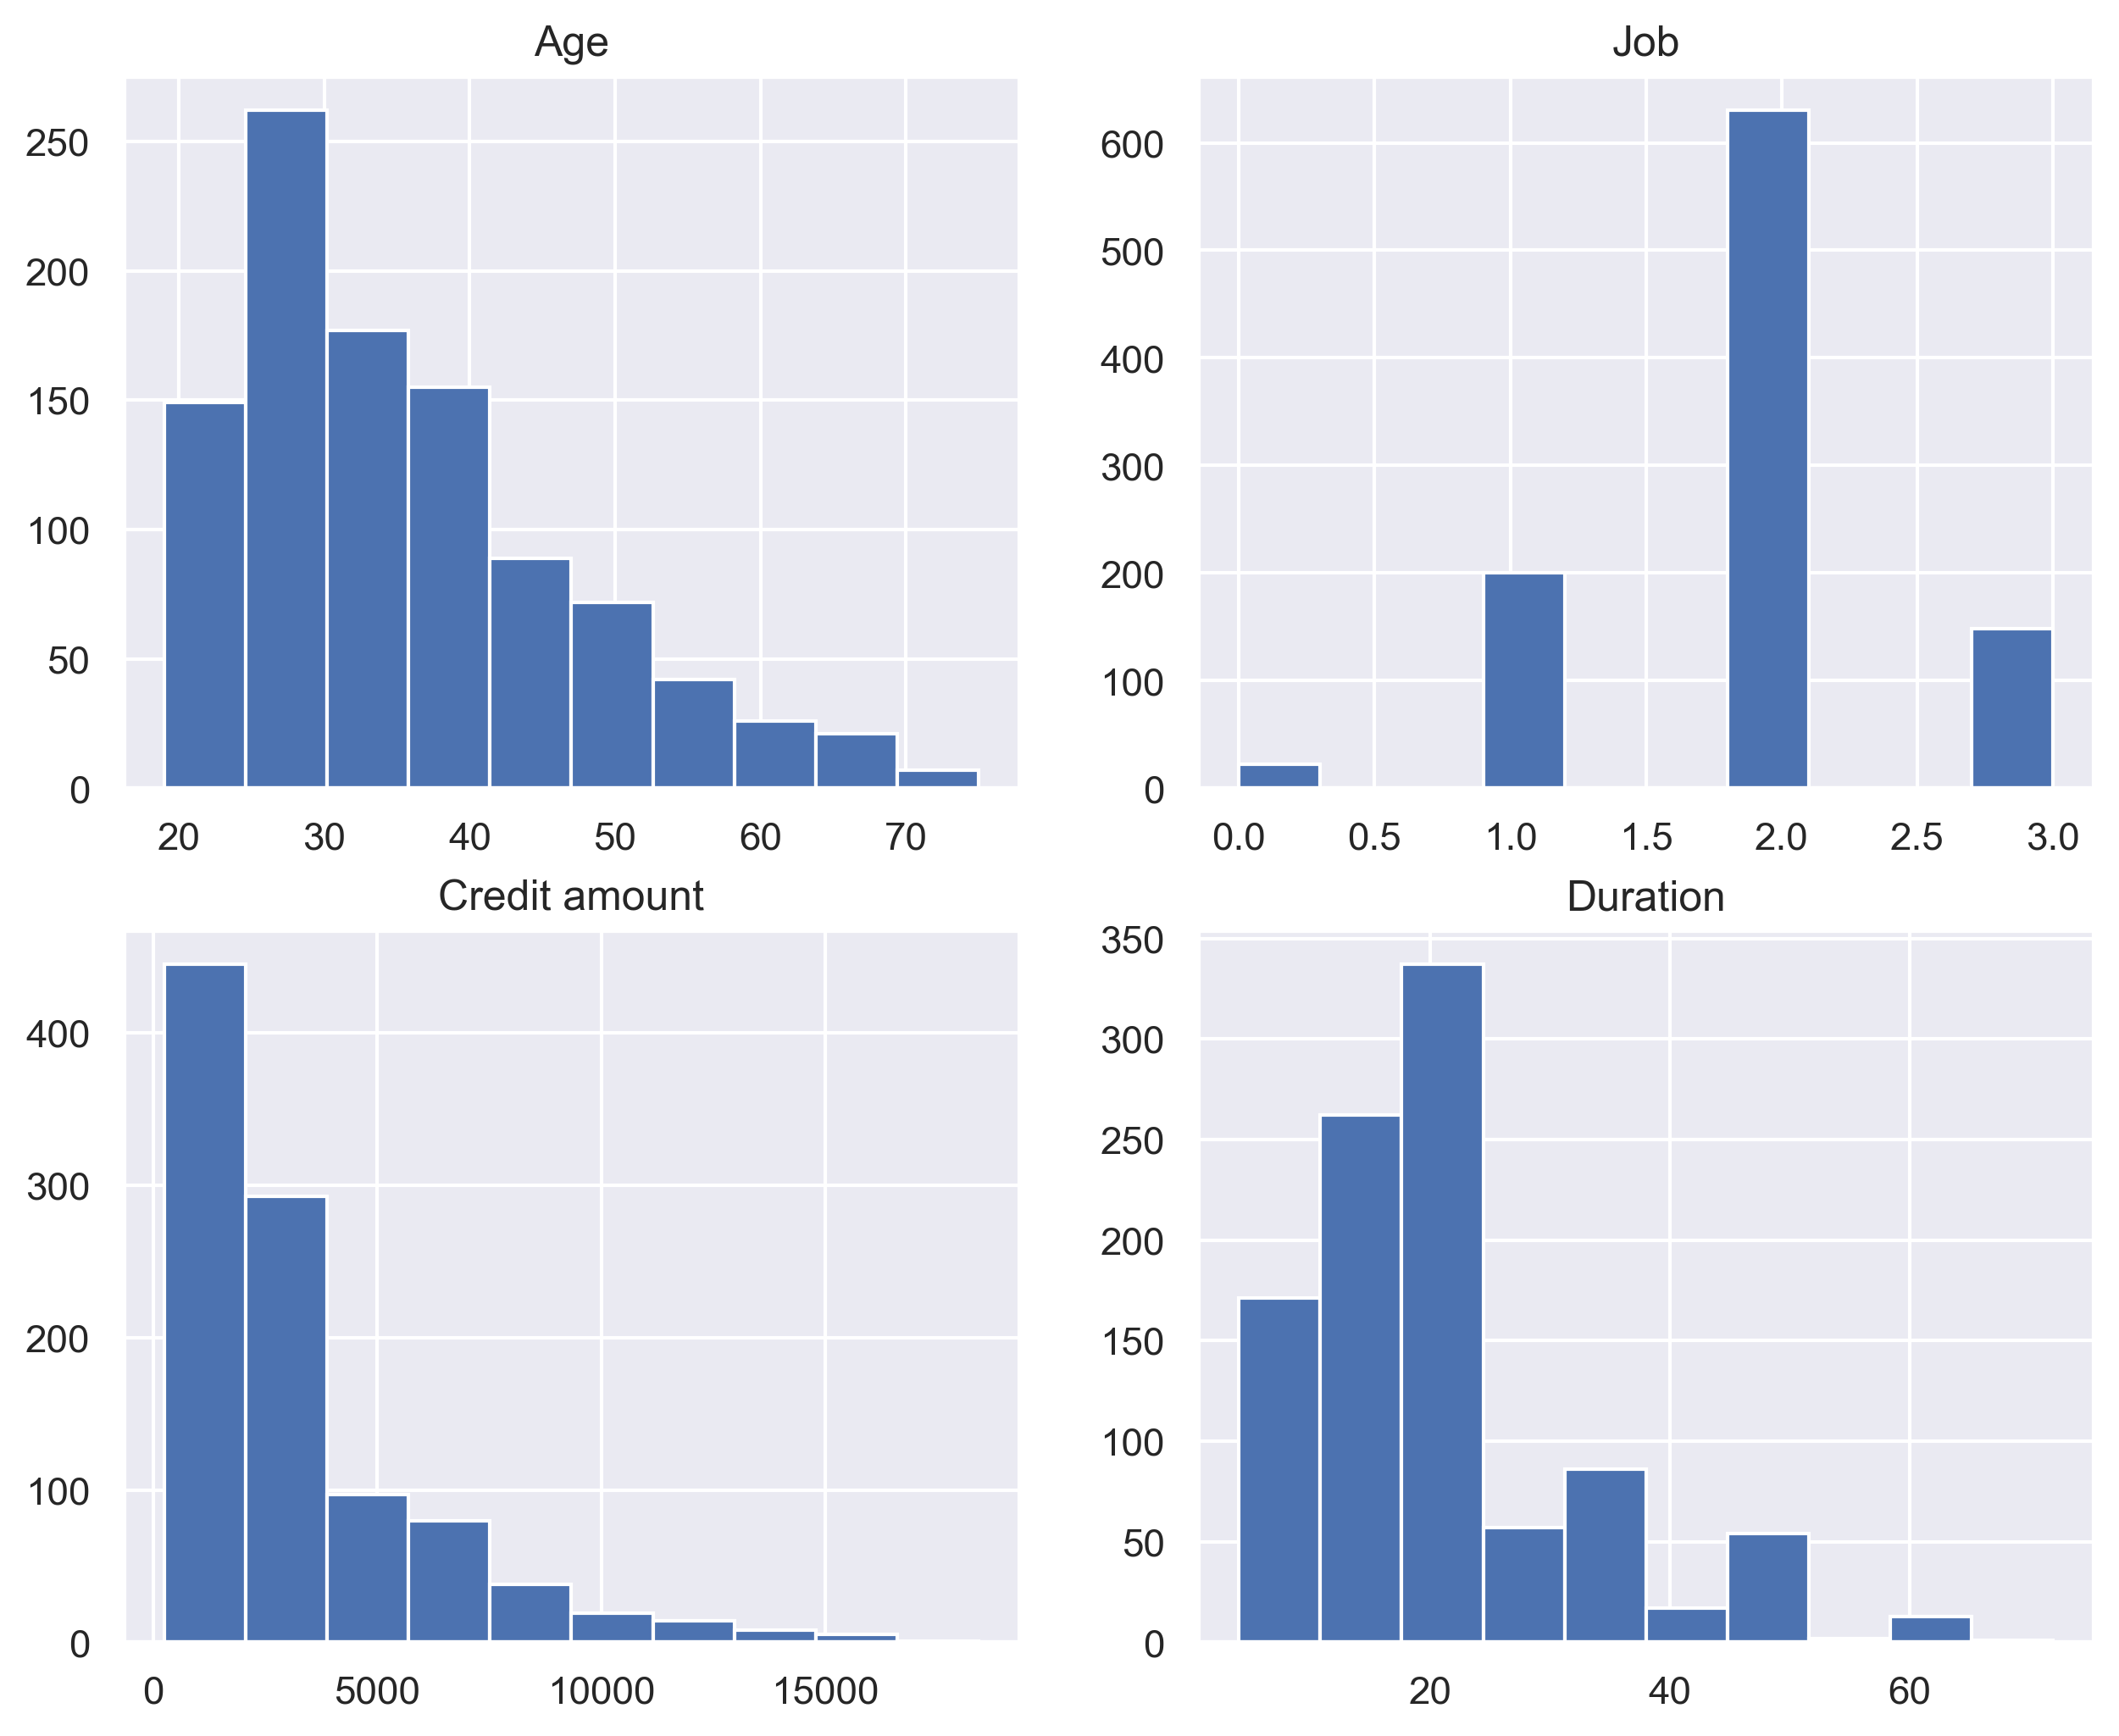

In [9]:
plt.figure(figsize=(10, 8))
k = 0
cols = numerical_credit.columns
for i, j in zip(range(len(cols)), cols):
    k +=1
    plt.subplot(2, 2, k)
    plt.hist(numerical_credit.iloc[:, i])
    plt.title(j)

다음은 엘보우 방법을 이용해 최적 군집 수를 결정하는 코드이다.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

In [11]:
scaler = StandardScaler()
scaled_credit = scaler.fit_transform(numerical_credit)

In [12]:
distance = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_credit)
    distance.append(kmeans.inertia_)

c:\Users\kumb2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kumb2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\kumb2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kumb2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

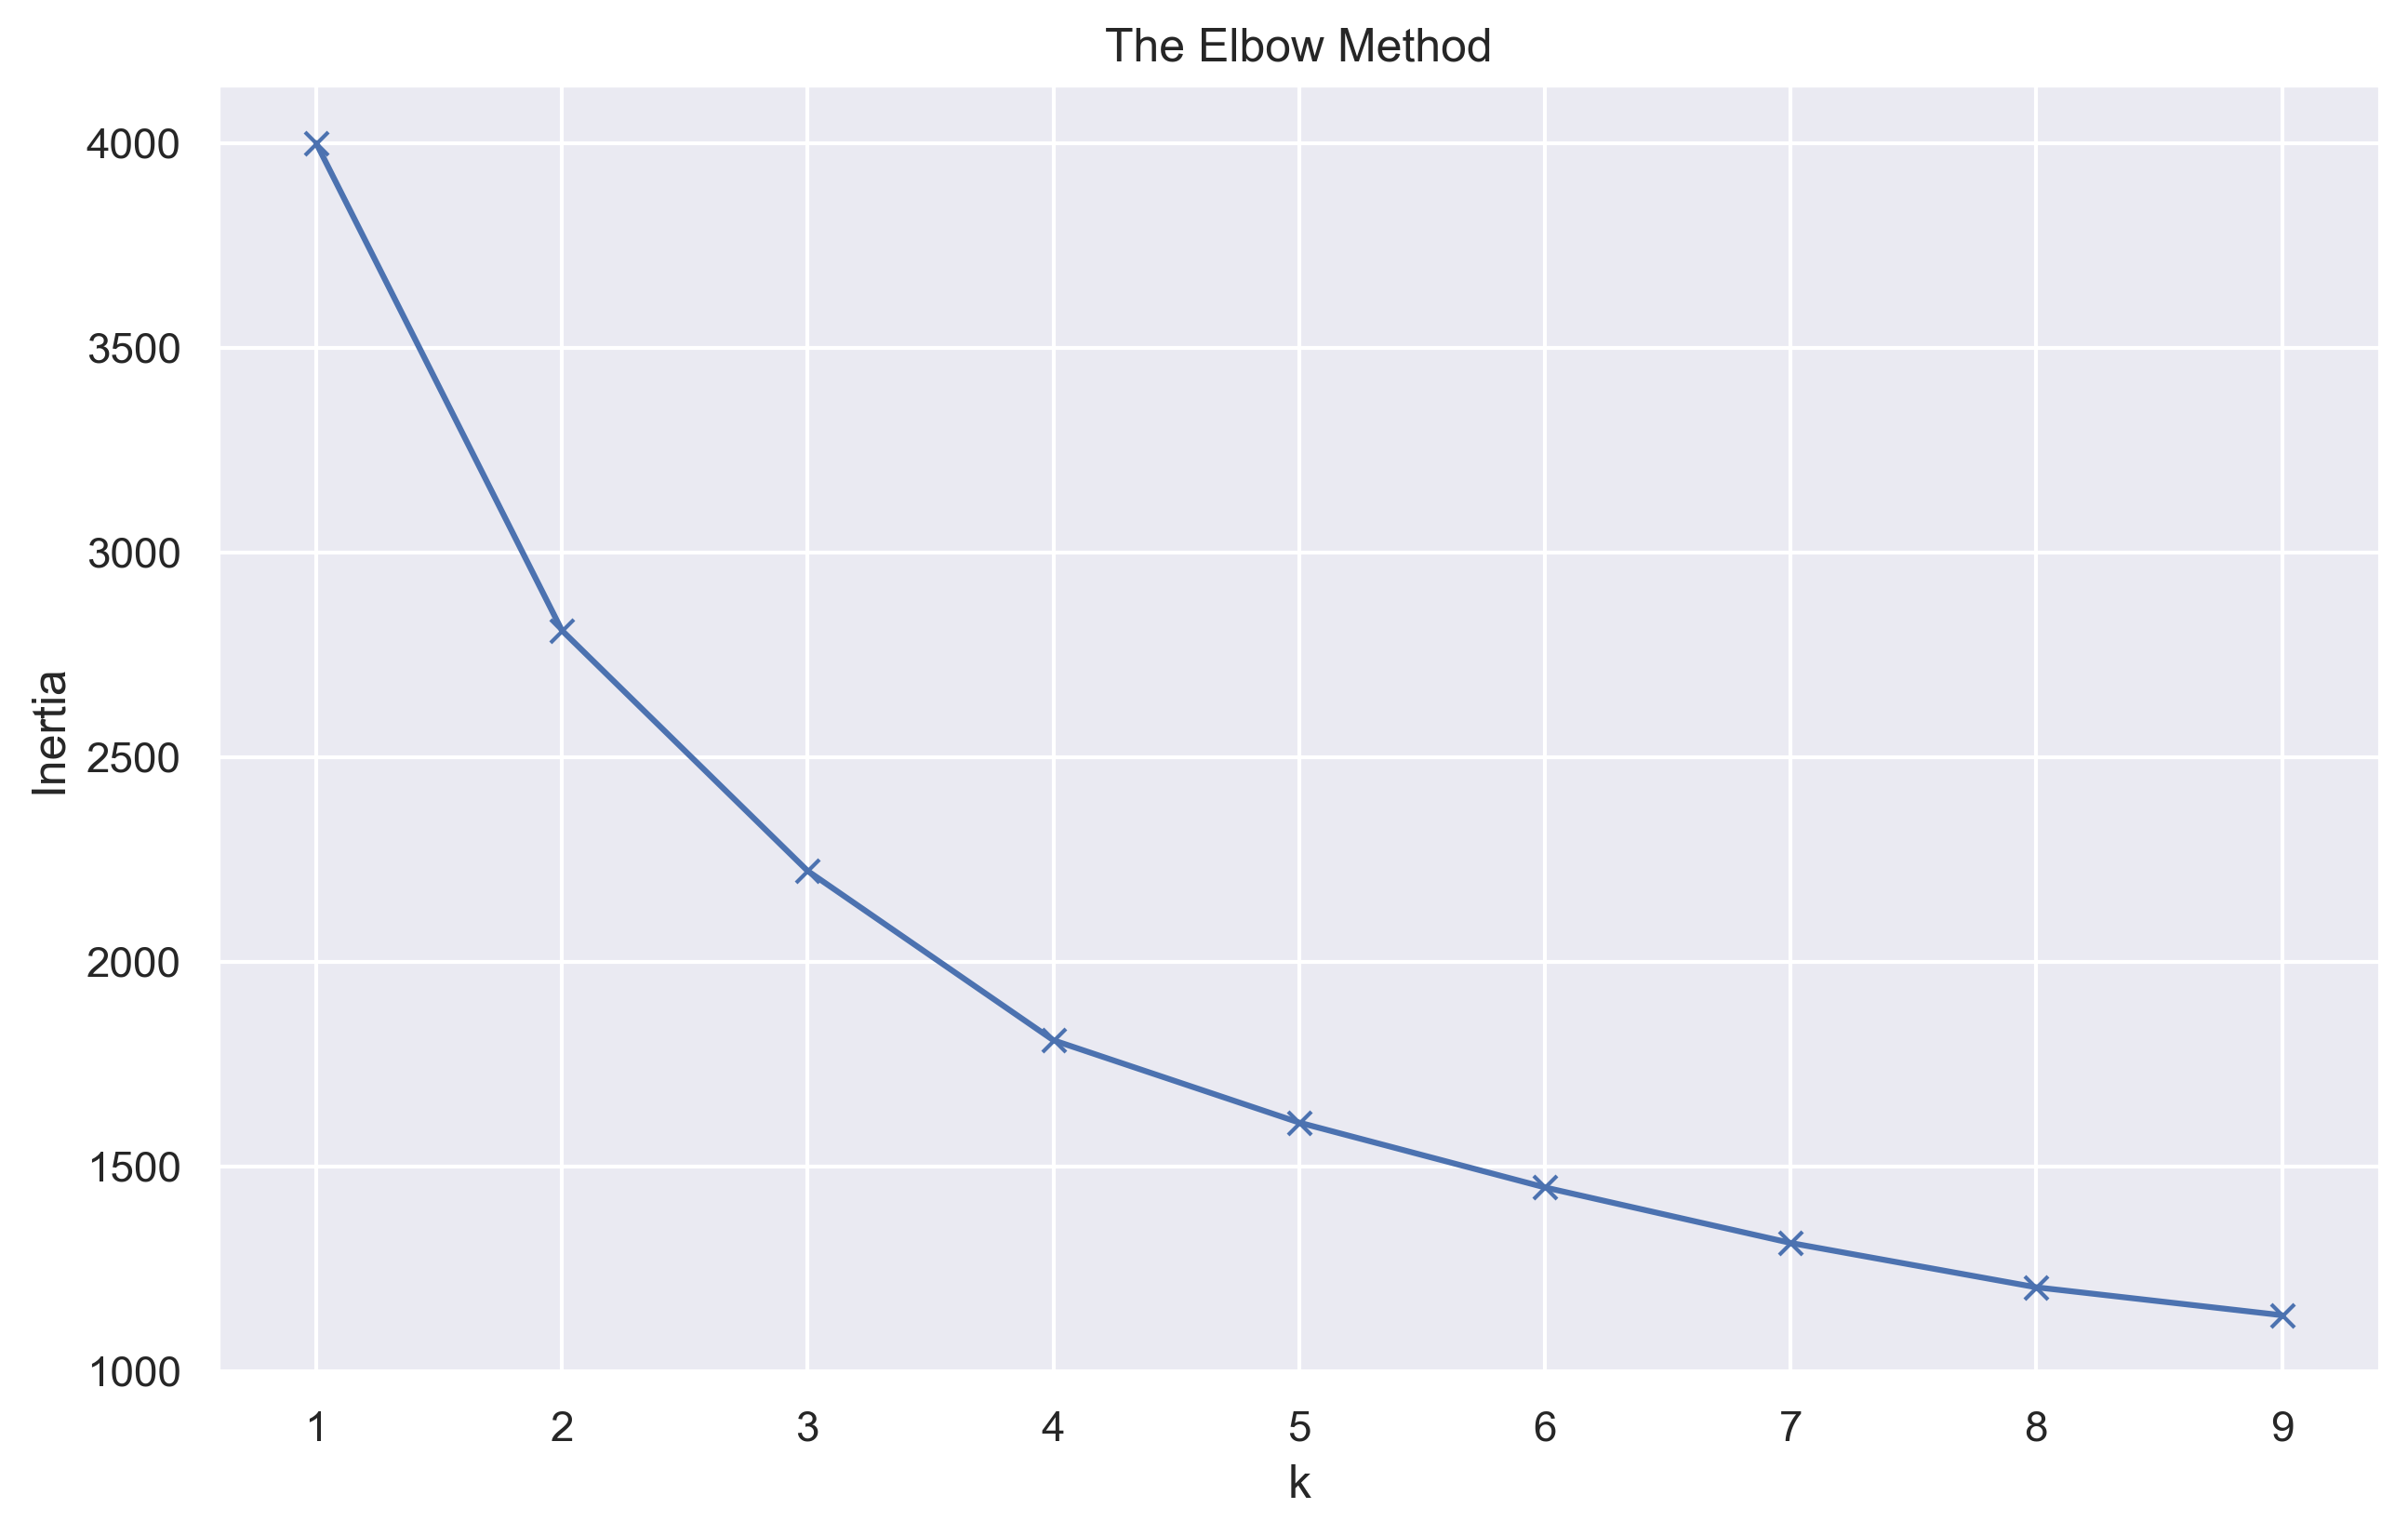

In [13]:
plt.plot(range(1, 10), distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

해당 그래프를 보면 4 지점에서 기울기가 급격하게 낮아짐을 알 수 있다. 따라서 엘보우 기법을 통해서는 k=4를 얻게 된다.

In [14]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

다음 코드는 실루엣 지수를 이용한 결과이다. 평균 실루엣 지수(점선)을 보면 k=2에서 최대화가 됨을 알 수 있다.

c:\Users\kumb2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kumb2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\kumb2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kumb2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

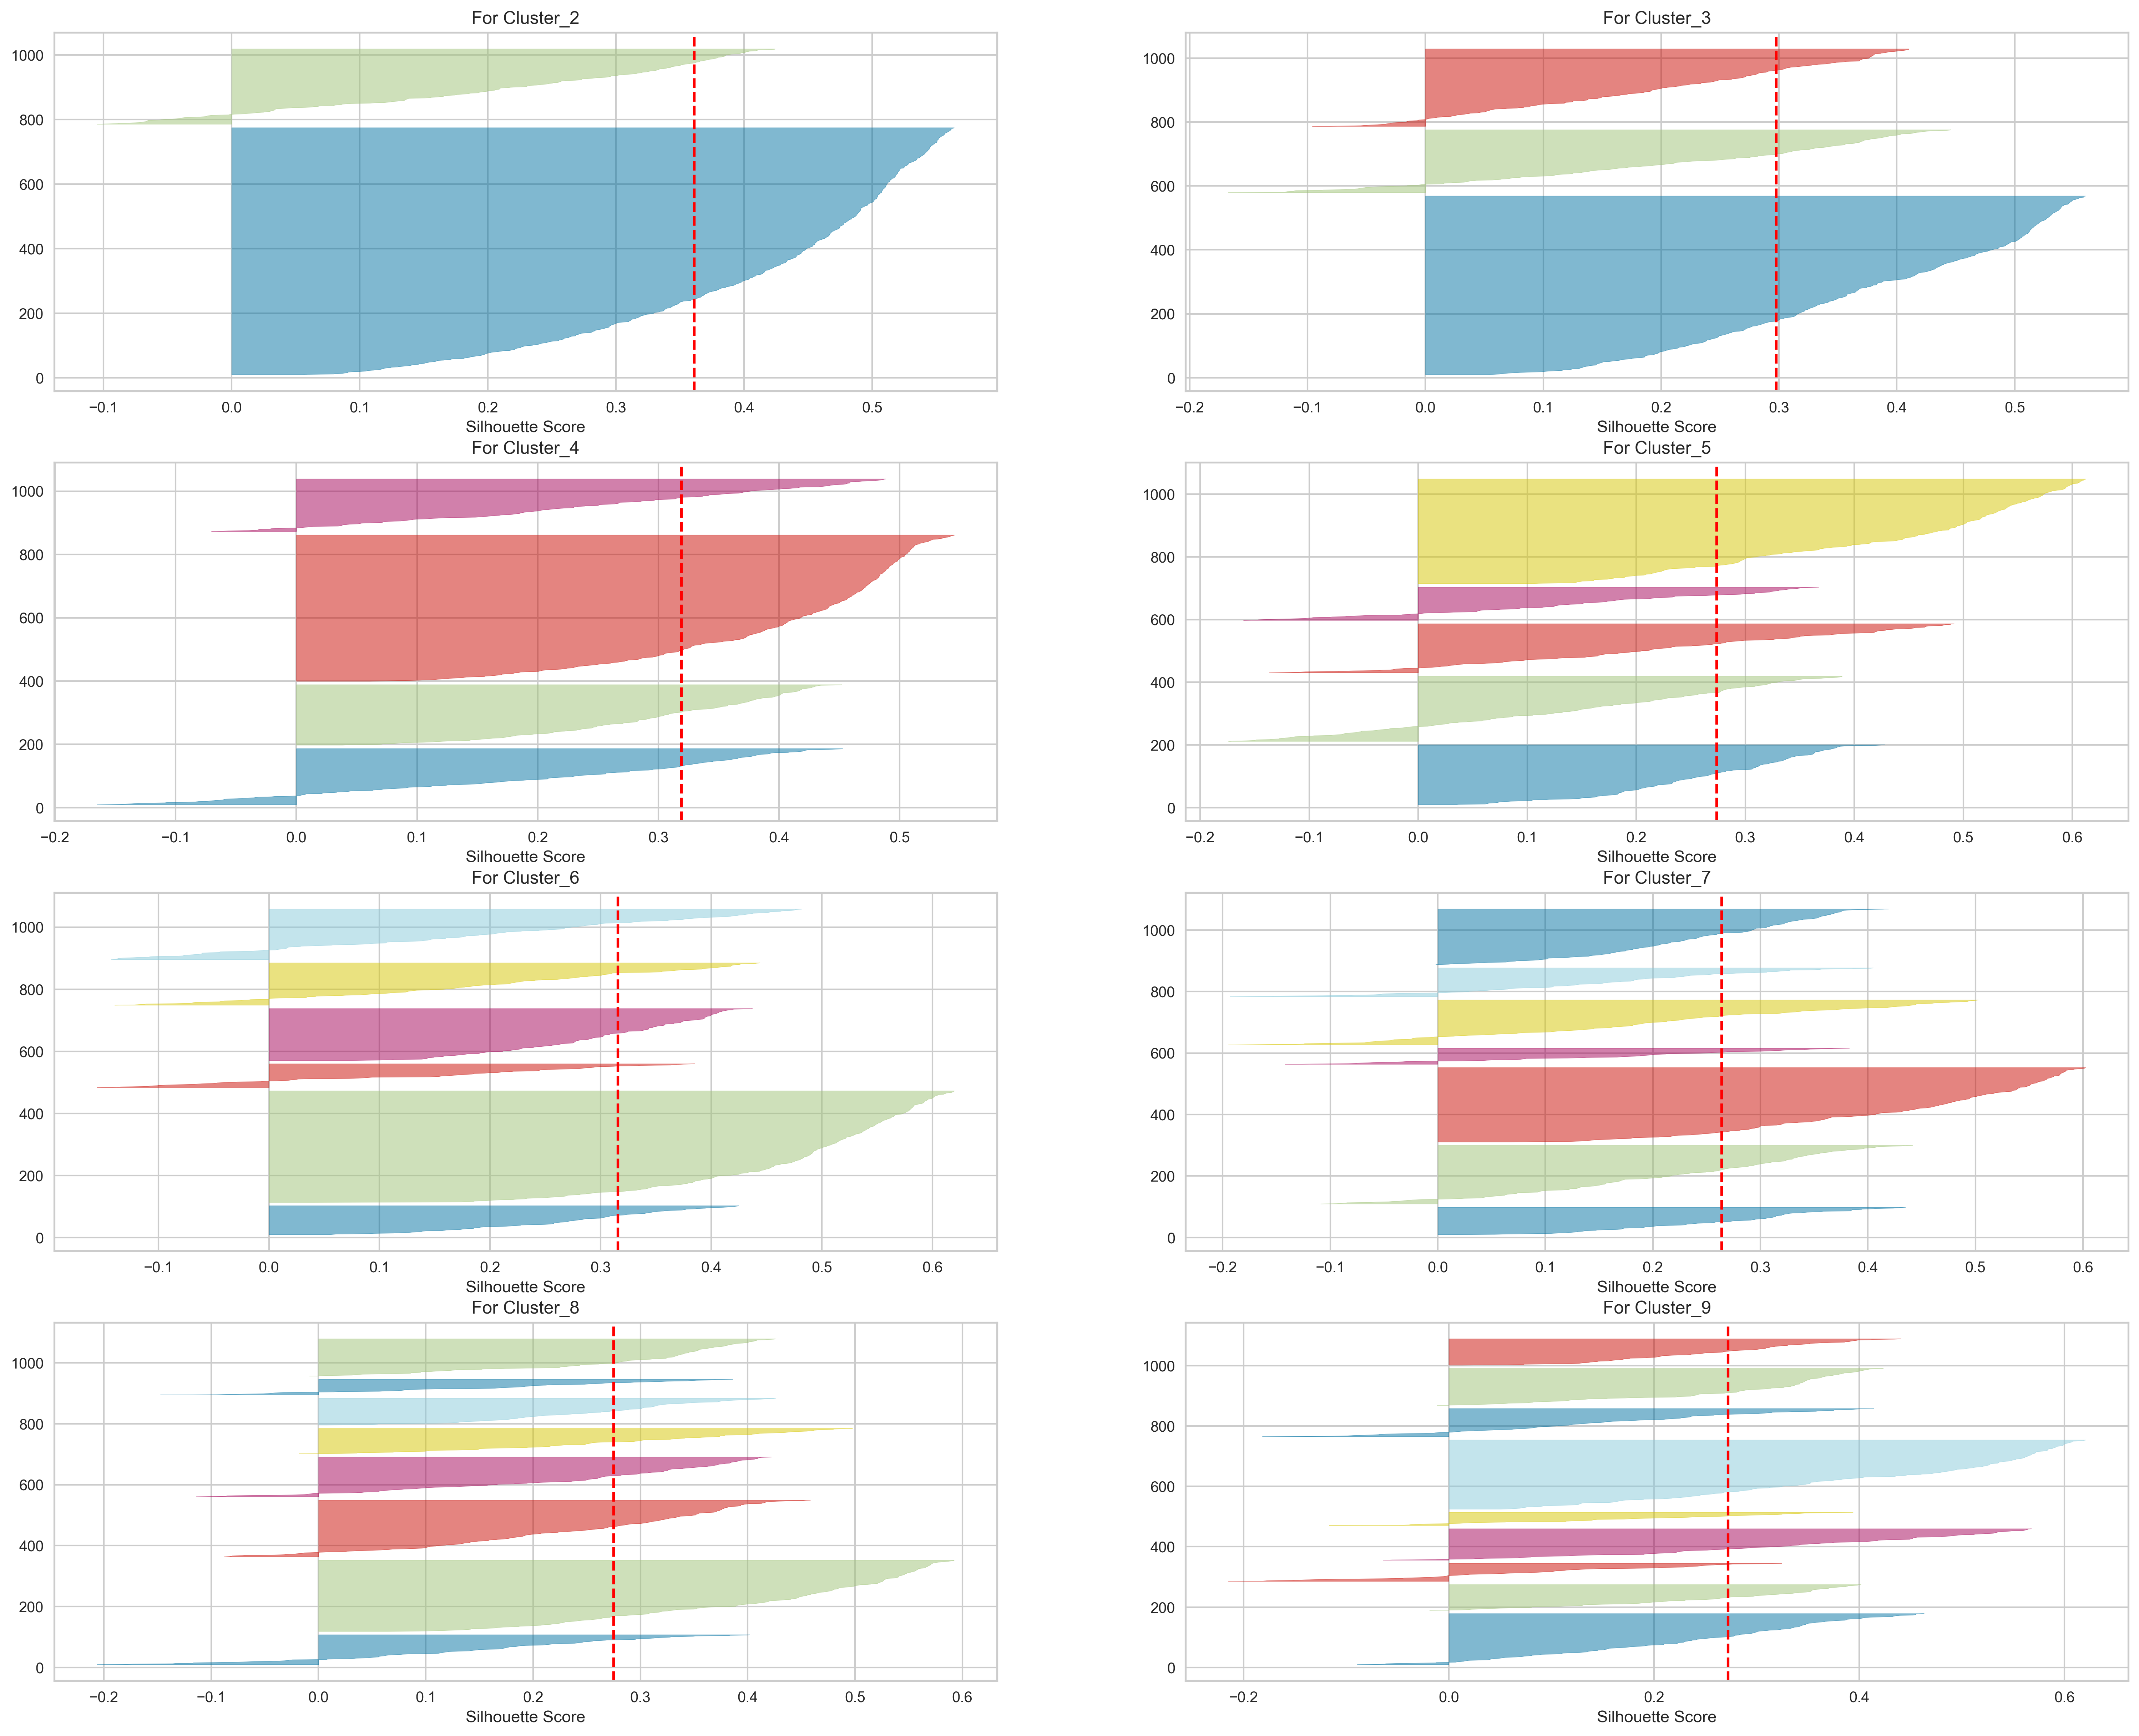

In [15]:
fig, ax = plt.subplots(4, 2, figsize=(25, 20))
for i in range(2, 10):
    km = KMeans(n_clusters=i)
    q, r = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick',
                                      ax=ax[q - 1][r])
    visualizer.fit(scaled_credit)
    ax[q - 1][r].set_title("For Cluster_"+str(i))
    ax[q - 1][r].set_xlabel("Silhouette Score")

다음은 분산비 기준, CH 기법을 사용한 코드이다. 동일하게 k=2에서 스코어가 최대가 됨을 알 수 있다.

c:\Users\kumb2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kumb2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\kumb2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kumb2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

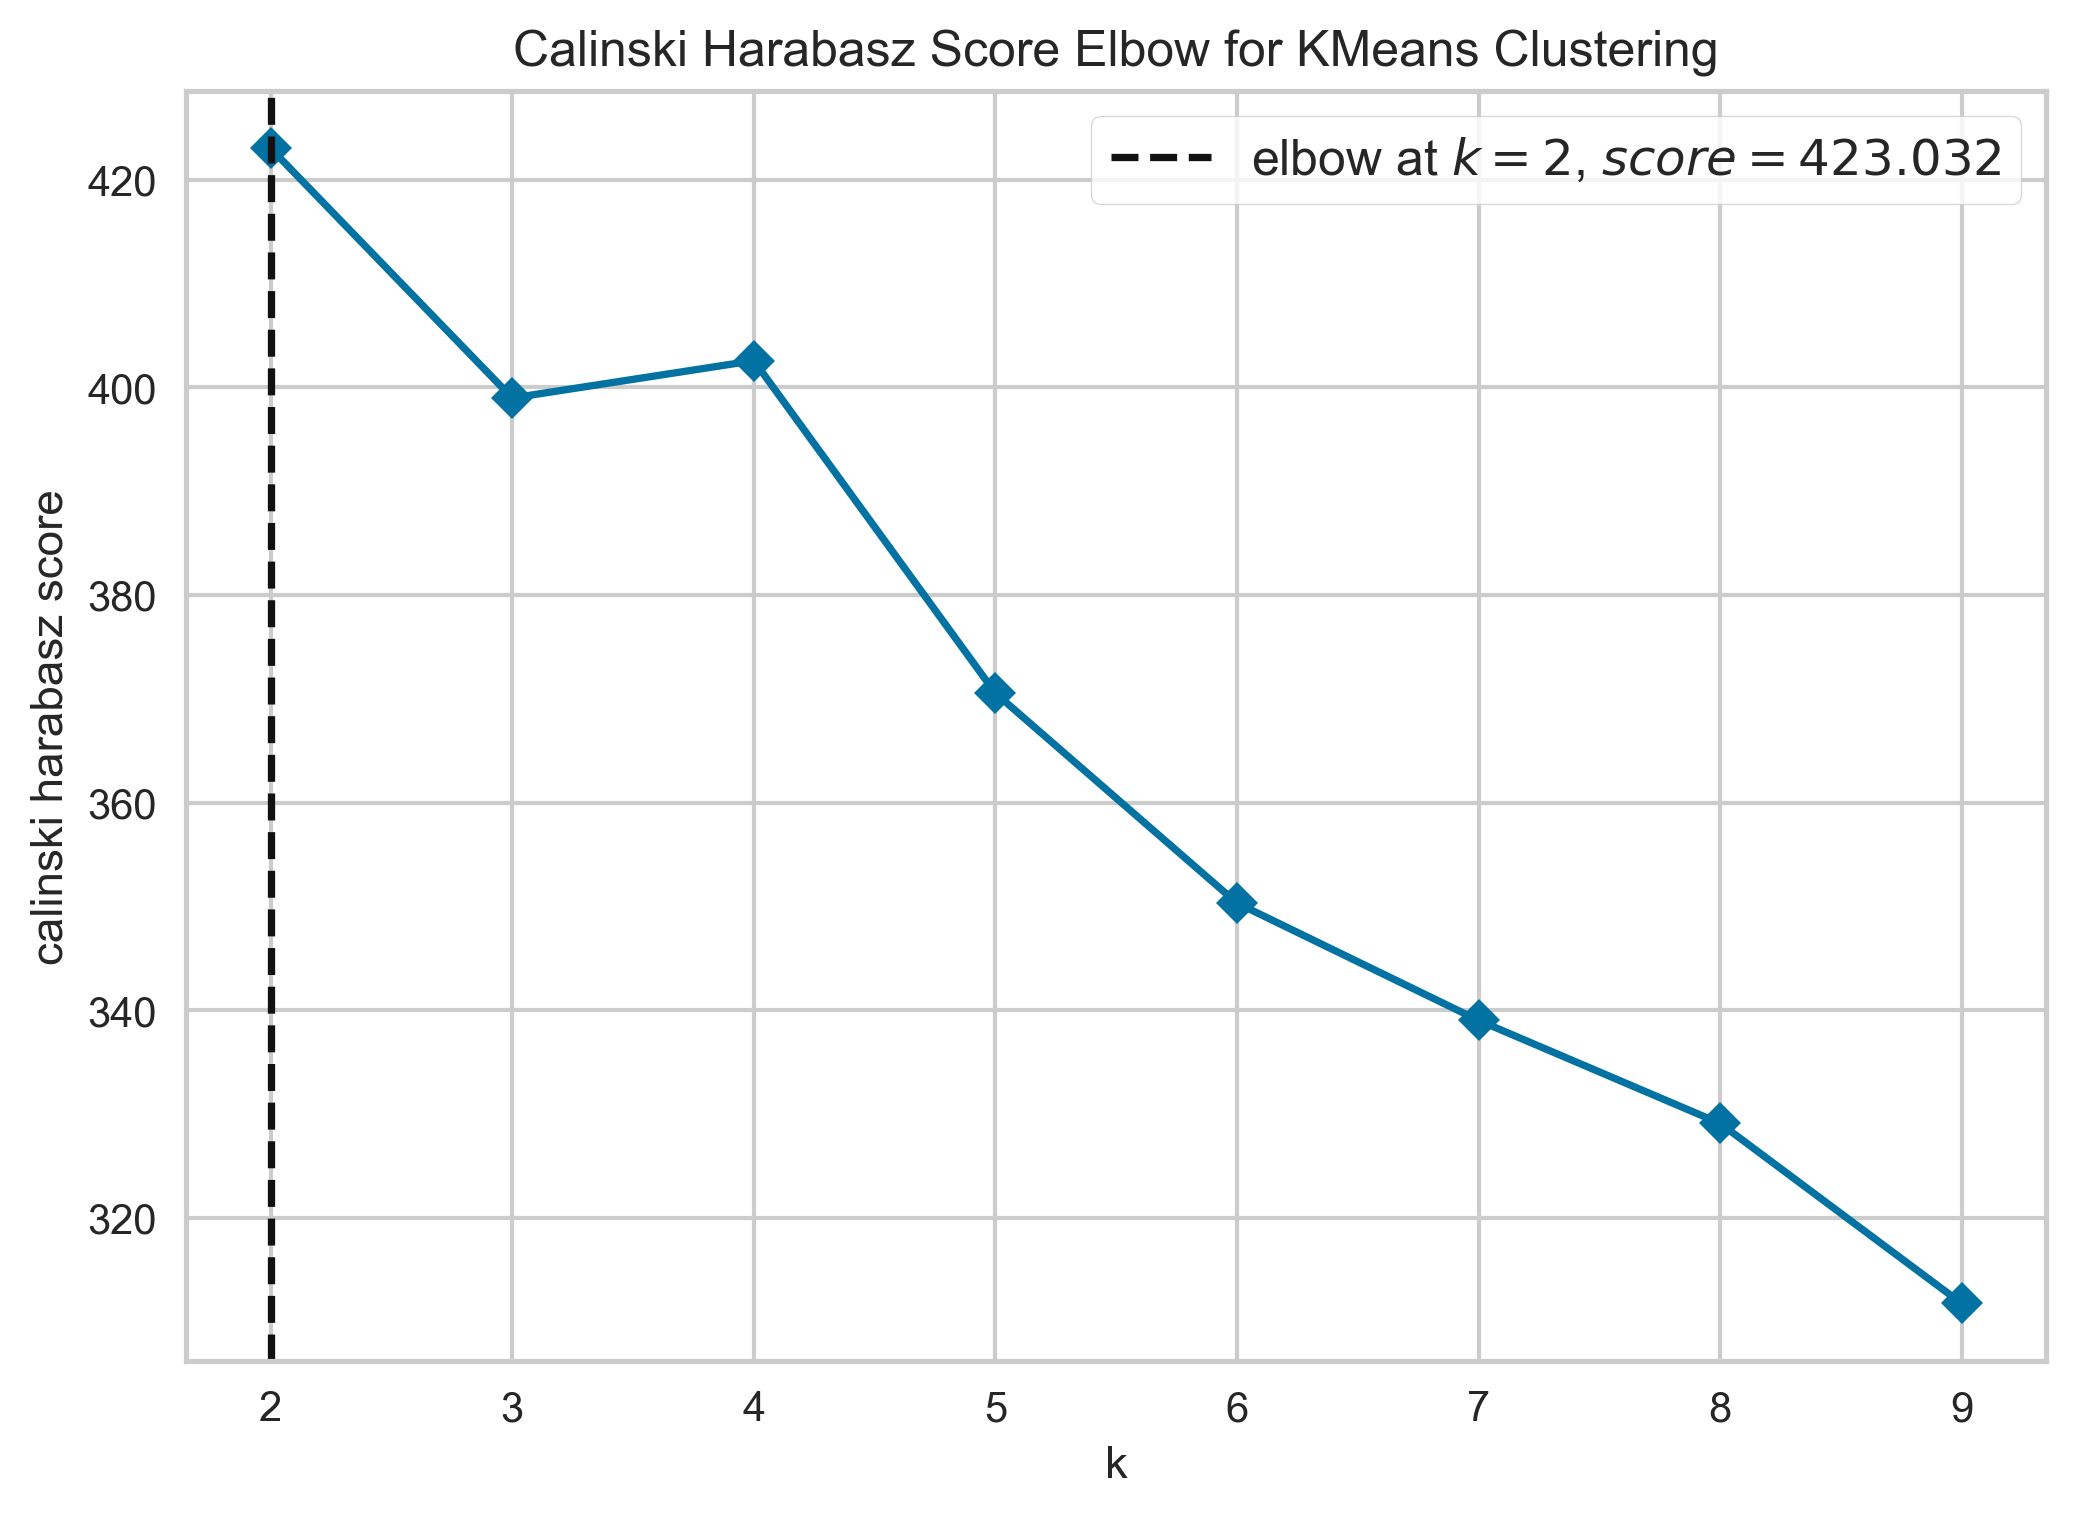

In [16]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10),
                              metric='calinski_harabasz',
                              timings=False)
visualizer.fit(scaled_credit)
visualizer.show();

다음은 gap 방법을 이용한 k 결정 과정이다.

In [17]:
from gap_statistic.optimalK import OptimalK

In [18]:
optimalK = OptimalK(n_jobs=8, parallel_backend='joblib')
n_clusters = optimalK(scaled_credit, cluster_array=np.arange(1, 10))

In [19]:
gap_result = optimalK.gap_df
gap_result.head()

n_clusters  gap_value  ref_dispersion_std        sk         gap*  \
0         1.0   0.899941           95.228433  0.011197  5838.291019   
1         2.0   0.935744           98.457011  0.015775  4393.583405   
2         3.0   0.954999           81.261884  0.015292  3784.447217   
3         4.0   1.035616          150.044218  0.031995  3515.698522   
4         5.0   1.085943           96.081315  0.023079  3173.213677   

           sk*      diff        diff*  
0  6742.374506 -0.020028  6519.254415  
1  5074.546800 -0.003963  4980.046731  
2  4370.910543 -0.048622  4332.023133  
3  4063.274438 -0.027247  4008.275649  
4  3665.790803  0.004242  3631.083634

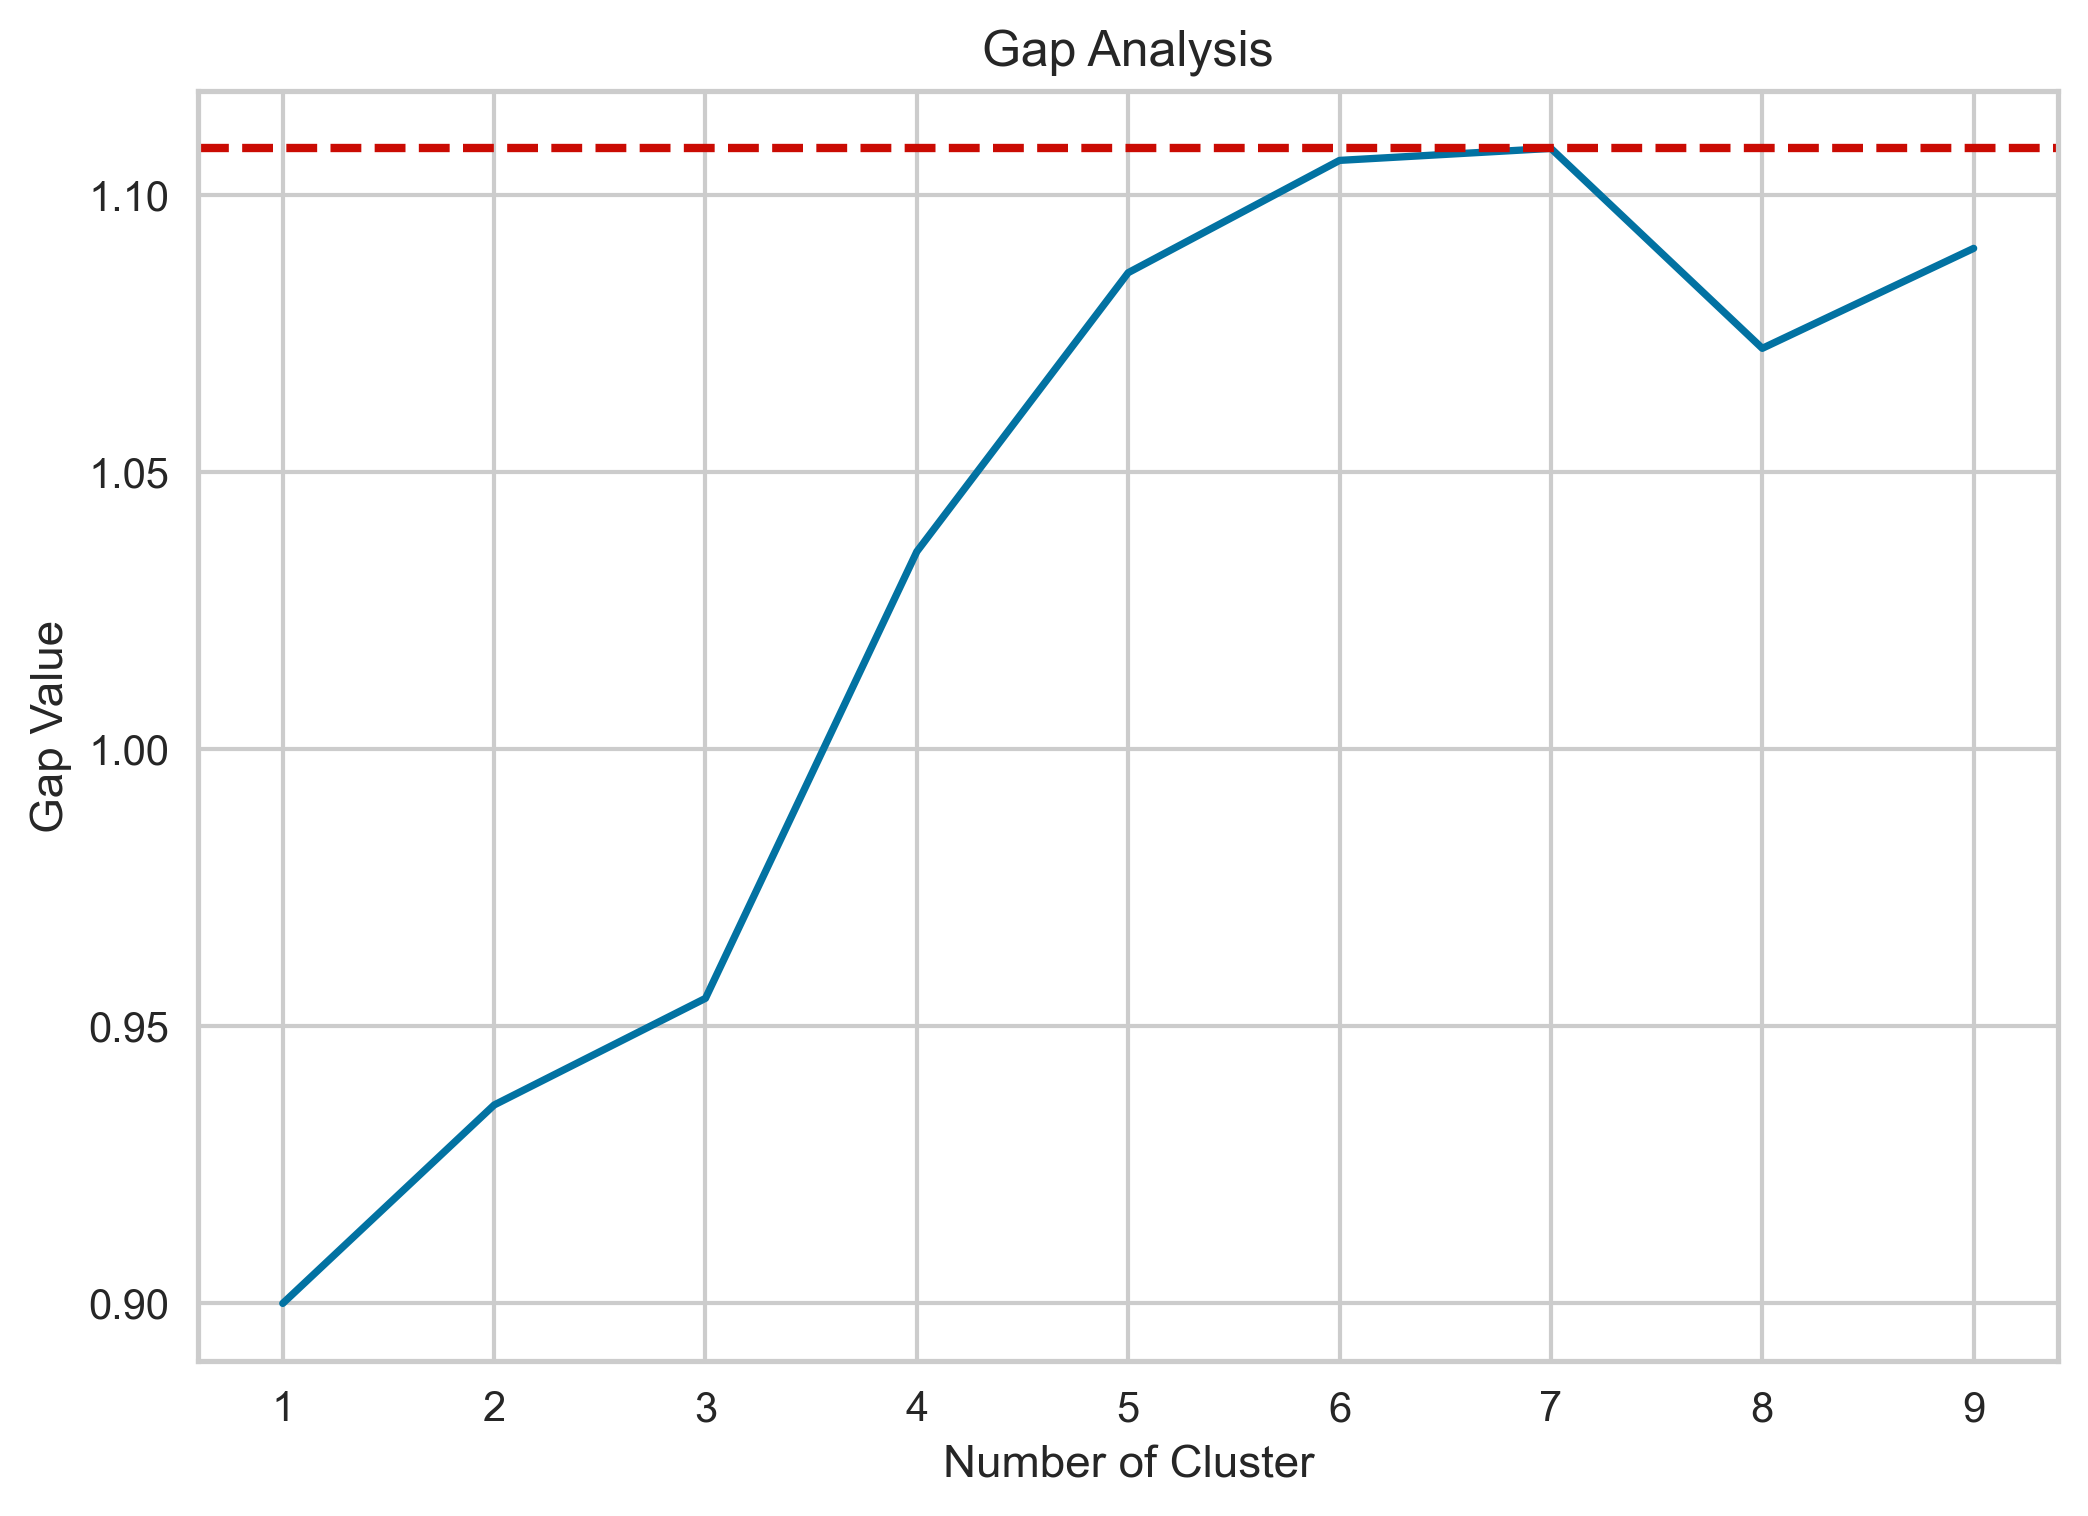

In [20]:
plt.plot(gap_result.n_clusters, gap_result.gap_value)
min_ylim, max_ylim = plt.ylim()
plt.axhline(np.max(gap_result.gap_value), color='r',
            linestyle='dashed', linewidth=2)
plt.title('Gap Analysis')
plt.xlabel('Number of Cluster')
plt.ylabel('Gap Value')
plt.show()

분석 결과 군집화를 위한 최적의 수를 찾게 되는 최댓값에서 멈추는 것이 좋으므로 k=6이 선택된다.

이상의 논의를 바탕으로 최적의 클러스터 개수는 2개로 결정되었다. 다음은 결정된 내용을 바탕으로 군집화를 수행하는 코드이다.

In [21]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(scaled_credit)

c:\Users\kumb2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kumb2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


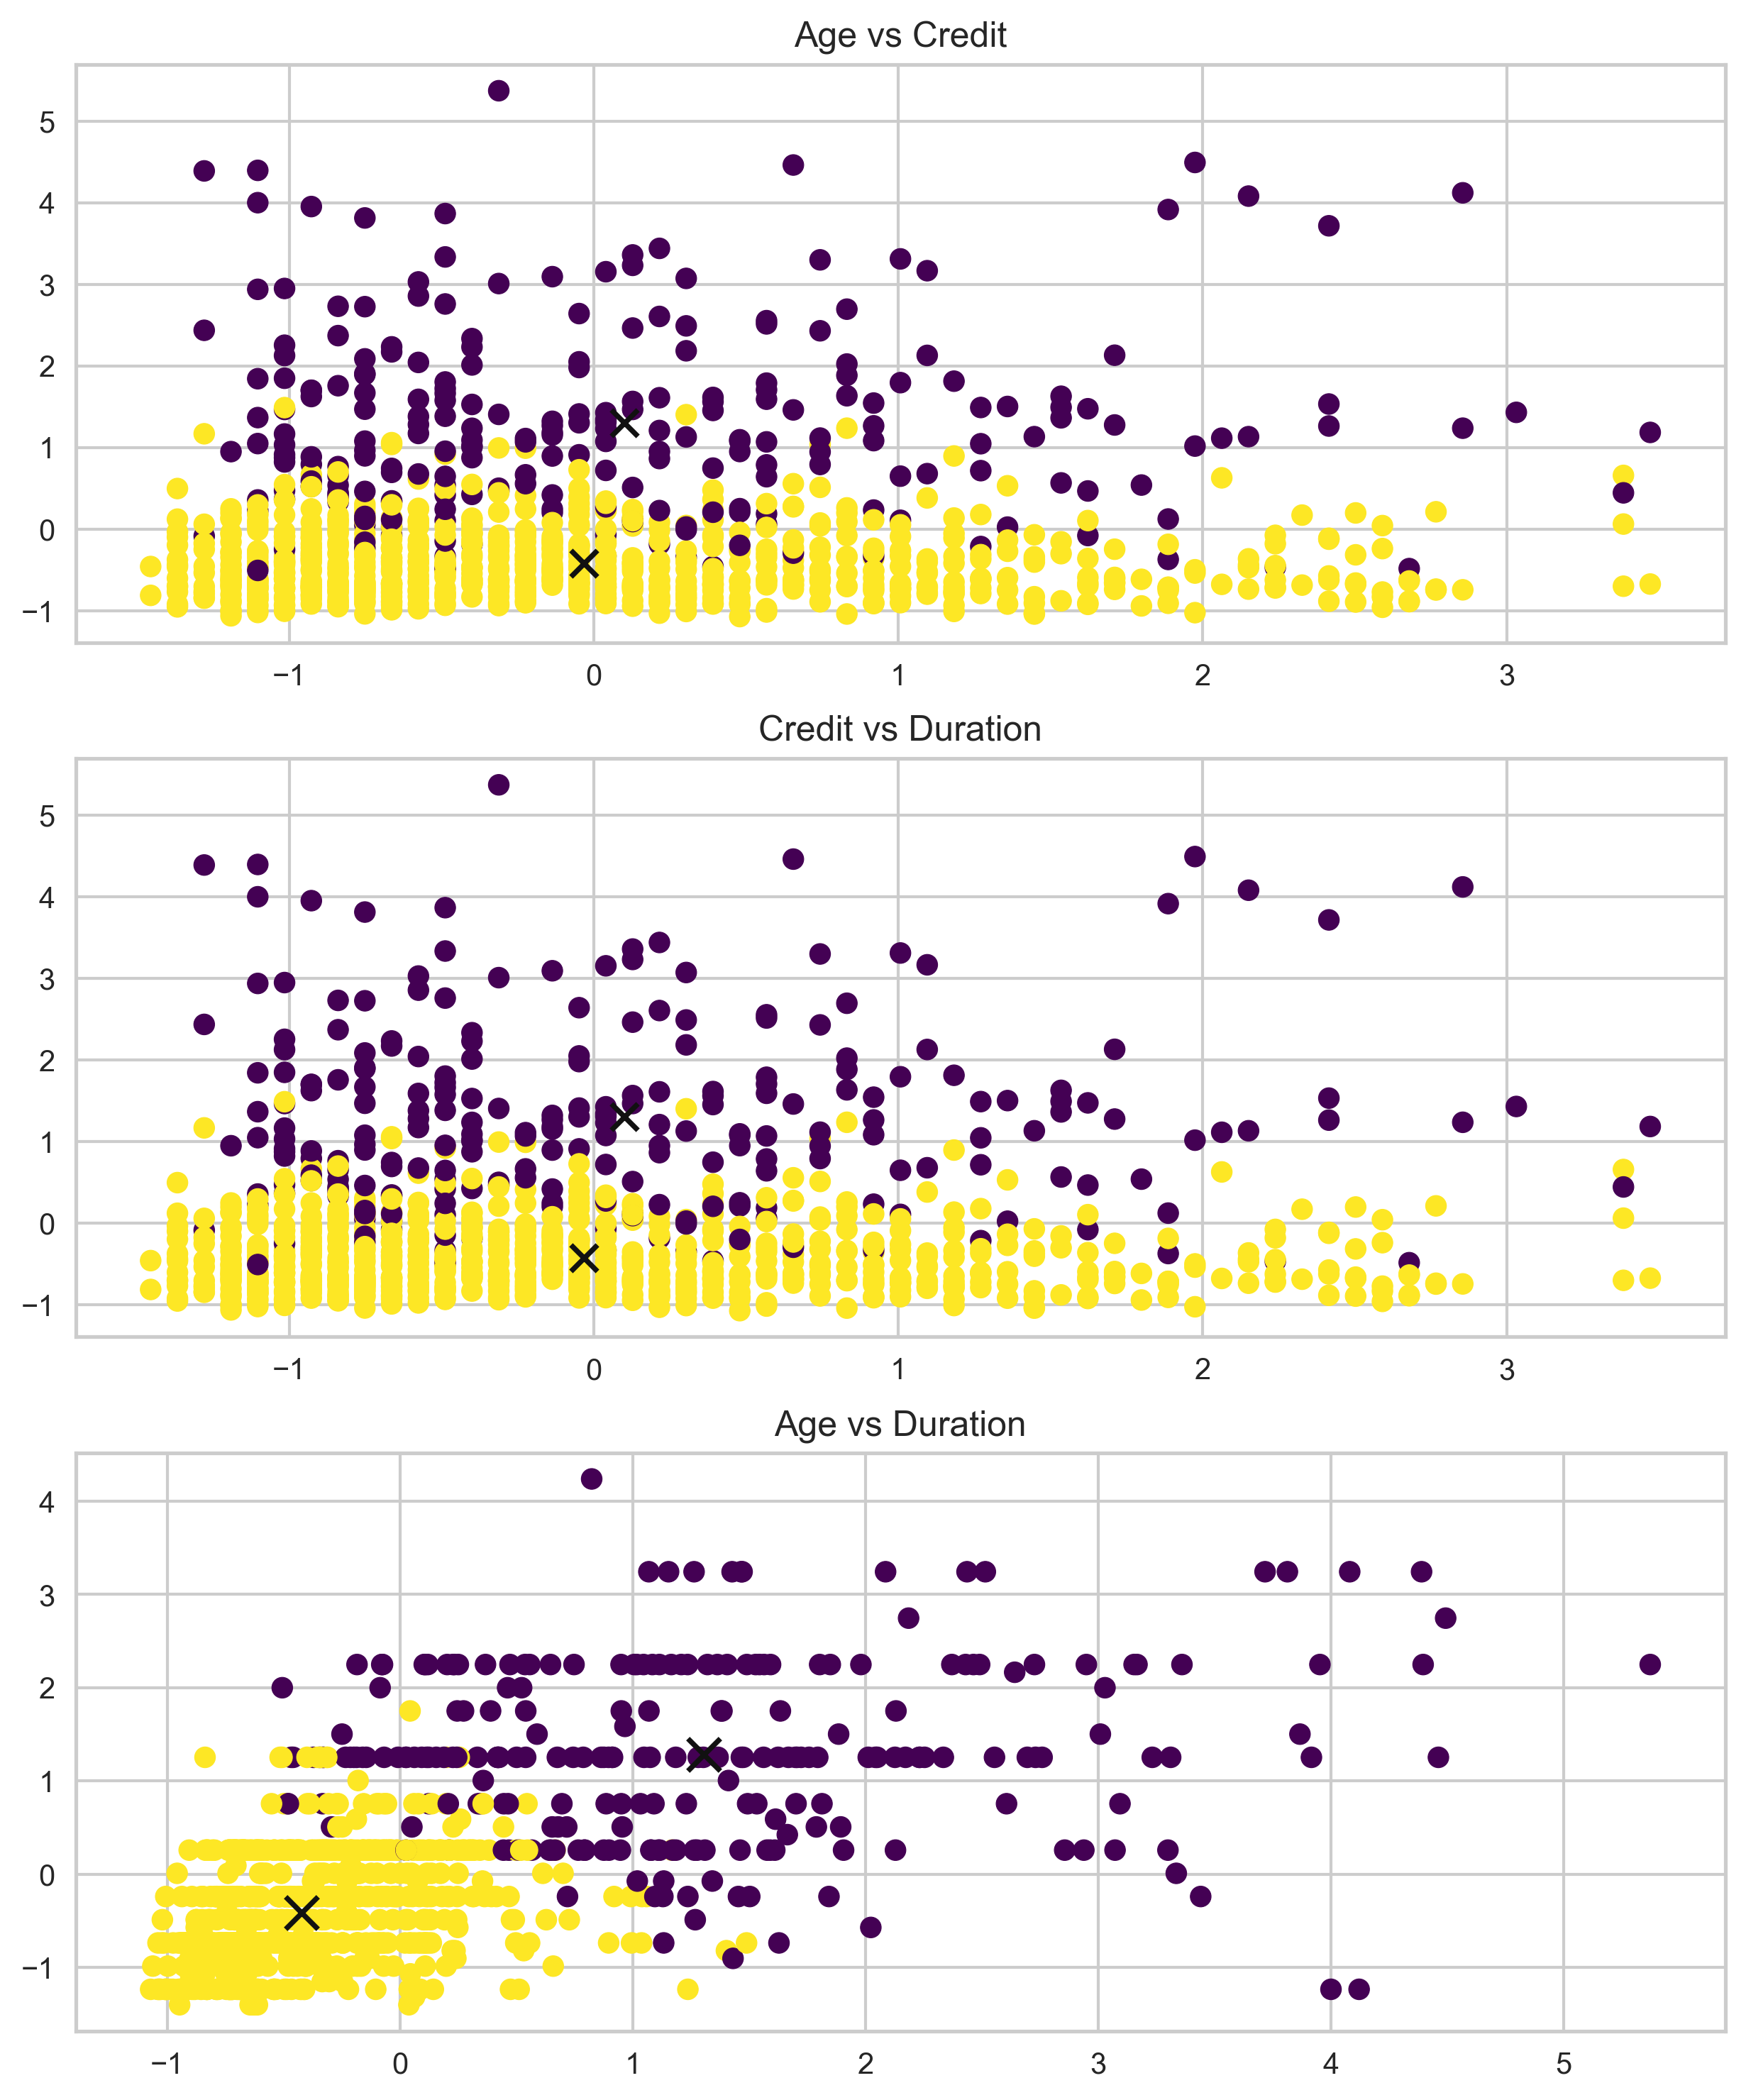

In [22]:
plt.figure(figsize=(10, 12))
plt.subplot(311)
plt.scatter(scaled_credit[:, 0], scaled_credit[:, 2],
            c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 2], s = 80,
            marker= 'x', color = 'k')
plt.title('Age vs Credit')

plt.subplot(312)
plt.scatter(scaled_credit[:, 0], scaled_credit[:, 2],
            c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 2], s = 80,
            marker= 'x', color = 'k')
plt.title('Credit vs Duration')

plt.subplot(313)
plt.scatter(scaled_credit[:, 2], scaled_credit[:, 3],
            c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 2],
            kmeans.cluster_centers_[:, 3], s = 120,
            marker= 'x', color = 'k')
plt.title('Age vs Duration')
plt.show()

## Logistic Regression for PD Estimation

**1.1 Logistic Model**

1958년 영국의 통계학자 Cox가 제안한 확률 모형으로써, 독립변수의 선형 결합을 이용하여 사건의 **발생 가능성**을 예측하는 데 사용되는 통계 기법이다. 독립 변수의 선형 결합으로 종속변수를 설명하는 관점에서는 선형 회귀 분석과 유사하지만, 종속변수가 범주형 데이터를 대상으로 한다는 점에서 분류 모형이라고 할 수 있다

Logistic Model(Logit Model)은 종속변수 $Y_i$가 1의 값을 갖는 확률 $p_i$를 아래와 같이 가정한다

$$p_i = E(Y_i) = \frac{1}{1+e^{-\mathbf{\beta X_i}}}$$

이진 분류 모형의 경우 아래와 같이 분류를 생각해볼 수 있다

$$p(Y_i = 1) = p_i = \frac{1}{1+e^{-\mathbf{\beta X_i}}} = \frac{e^{\mathbf{\beta X_i}}}{1+e^{\mathbf{\beta X_i}}}$$

$$p(Y_i = 0) = 1 - p_i = \frac{1e^{-\mathbf{\beta X_i}}}{1+e^{-\mathbf{\beta X_i}}} = \frac{1}{1+e^{\mathbf{\beta X_i}}}$$

추정된 $\hat{p_i}$는 각각 1인 확률과 0인 확률을 추정한다. 여기서 추정된 확률이 0.5보다 크면 1을, 0.5보다 작으면 0으로 처리하는 분류 모형을 고려할 수 있다



다음은 로지스틱 모형을 이용해 위의 클러스터 데이터를 바탕으로 회귀분석하는 코드이다.

In [23]:
clusters, counts = np.unique(kmeans.labels_, return_counts=True)

In [24]:
cluster_dict = {}
for i in range(len(clusters)):
    cluster_dict[i] = scaled_credit[np.where(kmeans.labels_==i)]

In [25]:
credit['clusters'] = pd.DataFrame(kmeans.labels_)

In [26]:
df_scaled = pd.DataFrame(scaled_credit)
df_scaled['clusters'] = credit['clusters']

In [27]:
df_scaled['Risk'] = credit['Risk']
df_scaled.columns = ['Age', 'Job', 'Credit amount',
                     'Duration', 'Clusters', 'Risk']

In [28]:
df_scaled[df_scaled.Clusters == 0]['Risk'].value_counts()

Risk
good    135
bad     109
Name: count, dtype: int64

In [29]:
df_scaled[df_scaled.Clusters == 1]['Risk'].value_counts()

Risk
good    565
bad     191
Name: count, dtype: int64

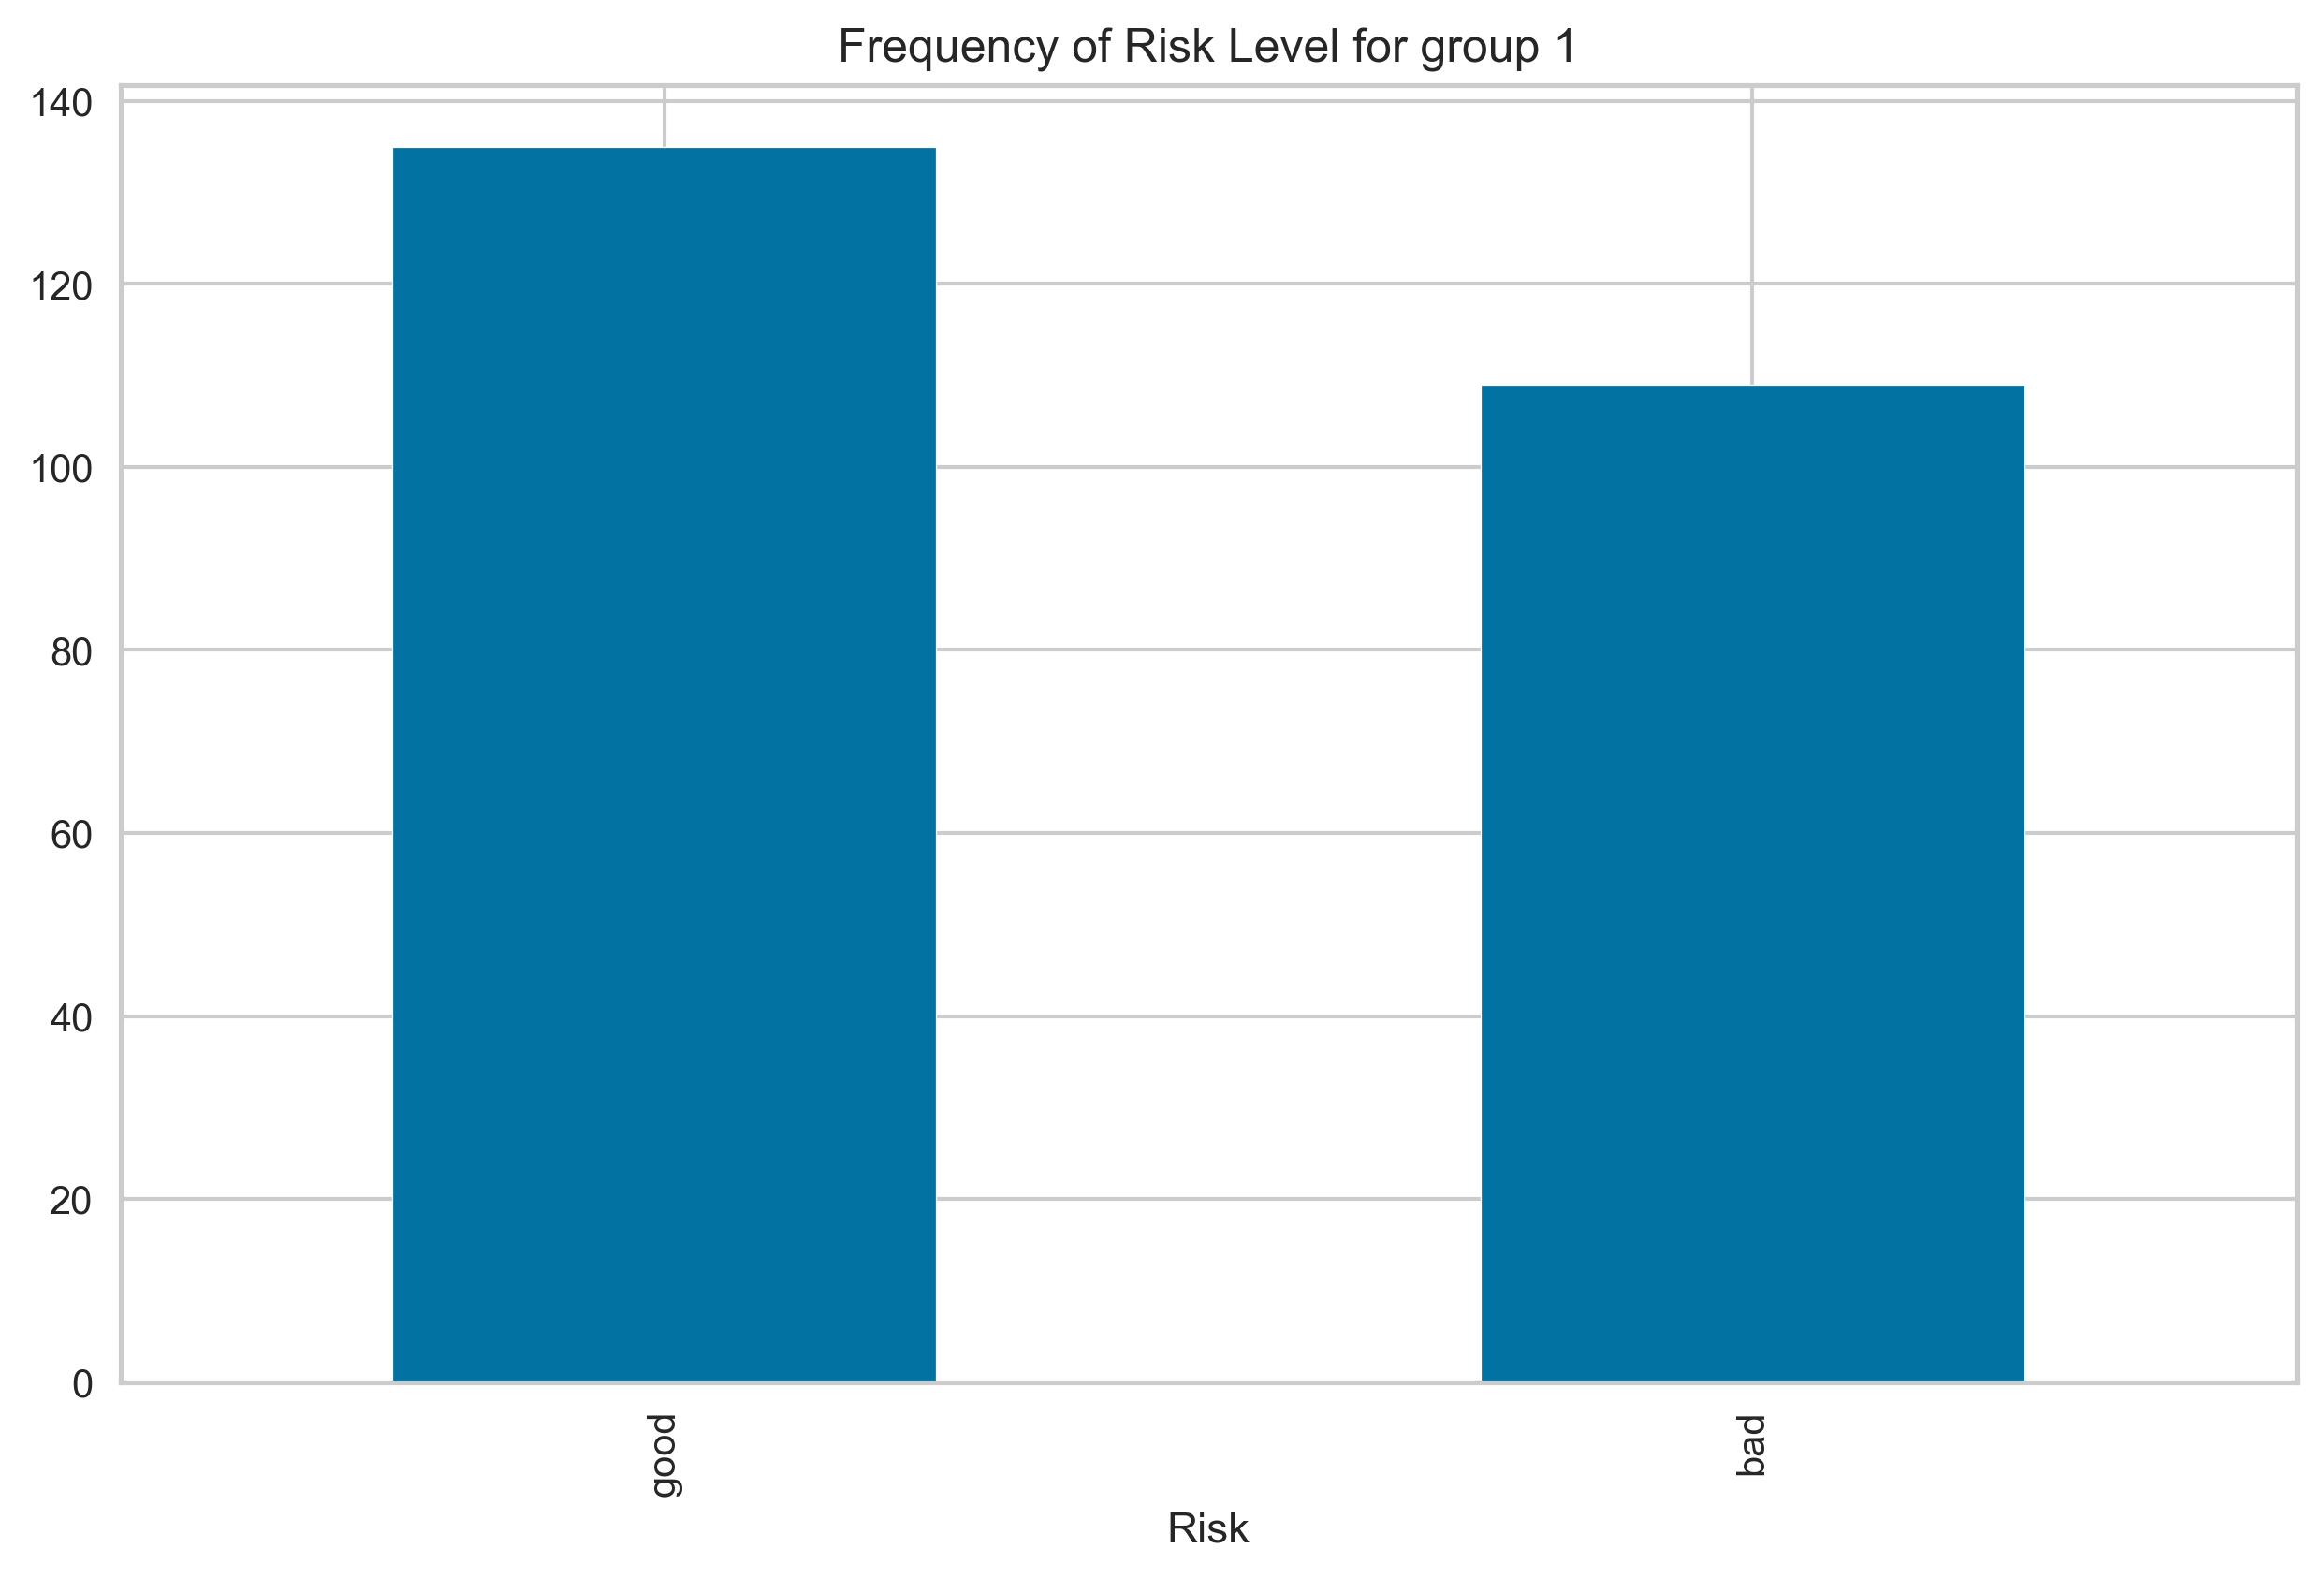

In [30]:
df_scaled[df_scaled.Clusters == 0]['Risk'].value_counts()\
                                    .plot(kind='bar',
                                    figsize=(10, 6),
                                    title="Frequency of Risk Level for group 1")
plt.show()

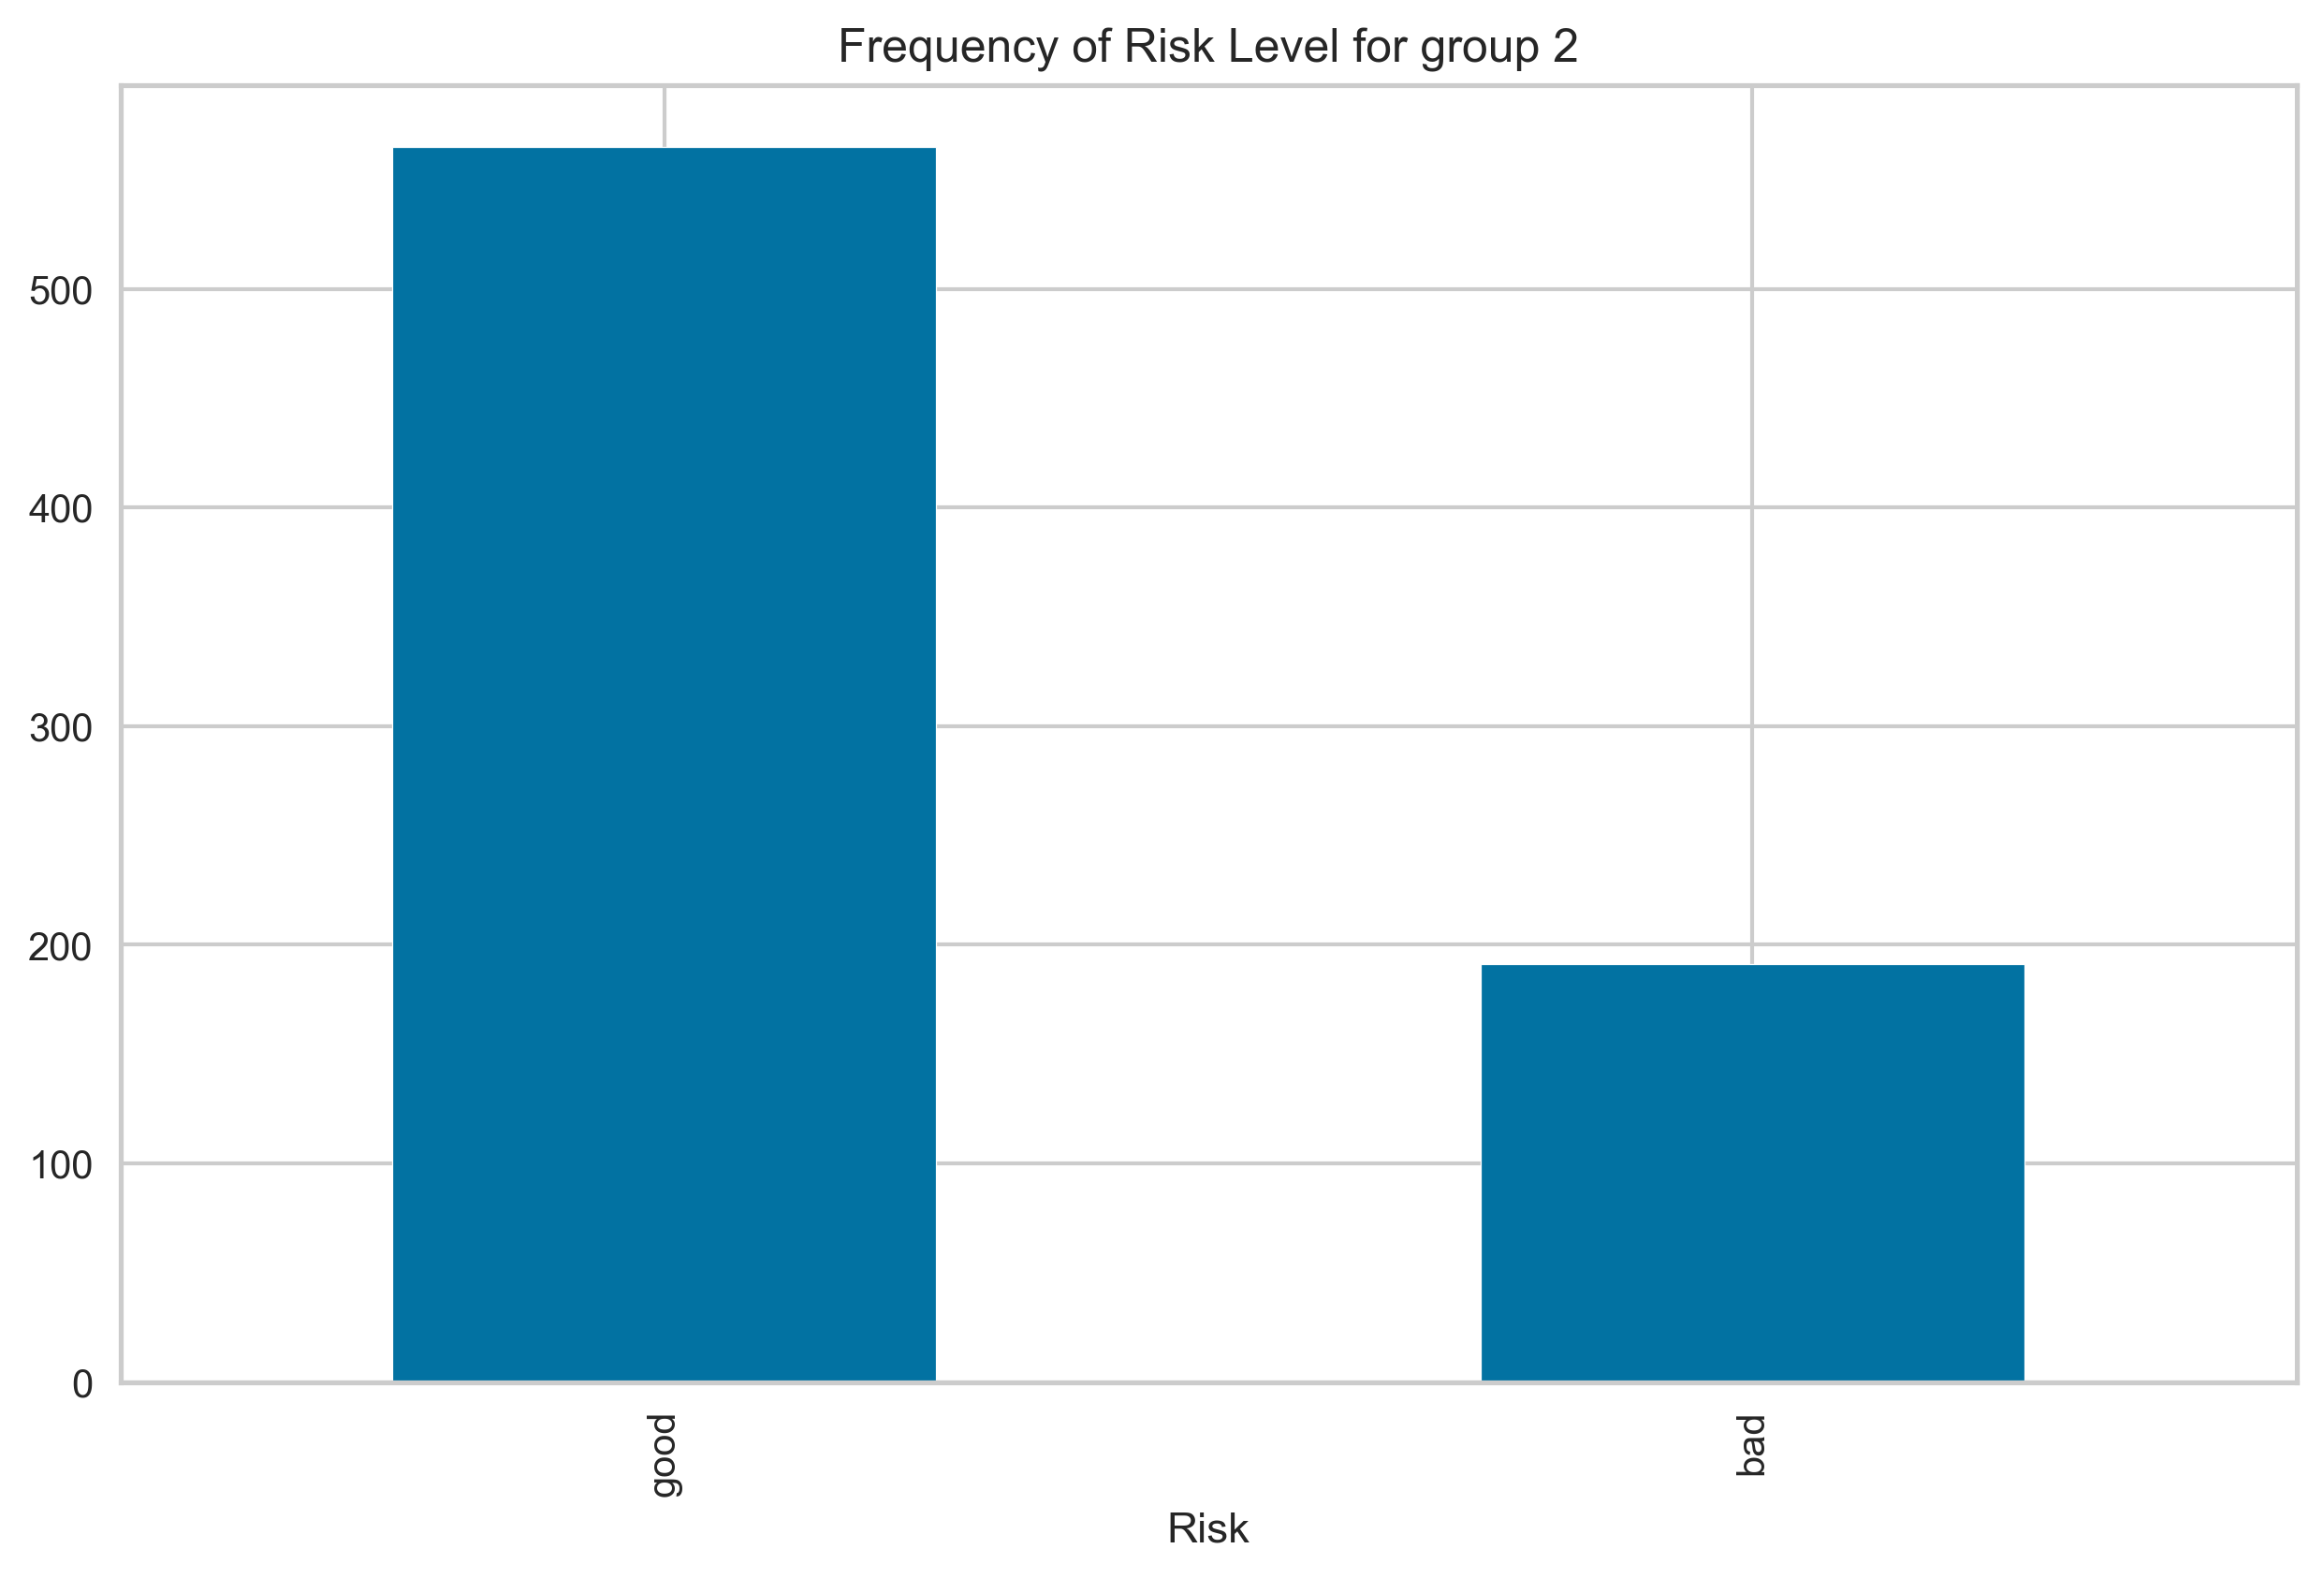

In [31]:
df_scaled[df_scaled.Clusters == 1]['Risk'].value_counts()\
                                    .plot(kind='bar',
                                    figsize=(10, 6),
                                    title="Frequency of Risk Level for group 2")
plt.show()

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
df_scaled['Risk'] = df_scaled['Risk'].replace({'good': 1, 'bad': 0})

In [34]:
X = df_scaled.drop('Risk', axis=1)
y = df_scaled.loc[:, ['Risk', 'Clusters']]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [36]:
first_cluster_train = X_train[X_train.Clusters == 0].iloc[:, :-1]
second_cluster_train = X_train[X_train.Clusters == 1].iloc[:, :-1]

In [37]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.combine import SMOTEENN
import warnings
warnings.filterwarnings('ignore')

In [38]:
X_train1 = first_cluster_train
y_train1 = y_train[y_train.Clusters == 0]['Risk']
smote = SMOTEENN(random_state = 2)
X_train1, y_train1 = smote.fit_resample(X_train1, y_train1.ravel())
logit = sm.Logit(y_train1, X_train1)
logit_fit1 = logit.fit()
print(logit_fit1.summary())

Optimization terminated successfully.
         Current function value: 0.646298
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   59
Model:                          Logit   Df Residuals:                       55
Method:                           MLE   Df Model:                            3
Date:                Sat, 19 Oct 2024   Pseudo R-squ.:                 0.06740
Time:                        13:18:16   Log-Likelihood:                -38.132
converged:                       True   LL-Null:                       -40.887
Covariance Type:            nonrobust   LLR p-value:                    0.1380
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Age               0.5778      0.351      1.647      0.100      -0.110       1.265
Job              -0.

In [39]:
first_cluster_test = X_test[X_test.Clusters == 0].iloc[:, :-1]
second_cluster_test = X_test[X_test.Clusters == 1].iloc[:, :-1]

In [40]:
X_test1 = first_cluster_test
y_test1 = y_test[y_test.Clusters == 0]['Risk']
pred_prob1 = logit_fit1.predict(X_test1)

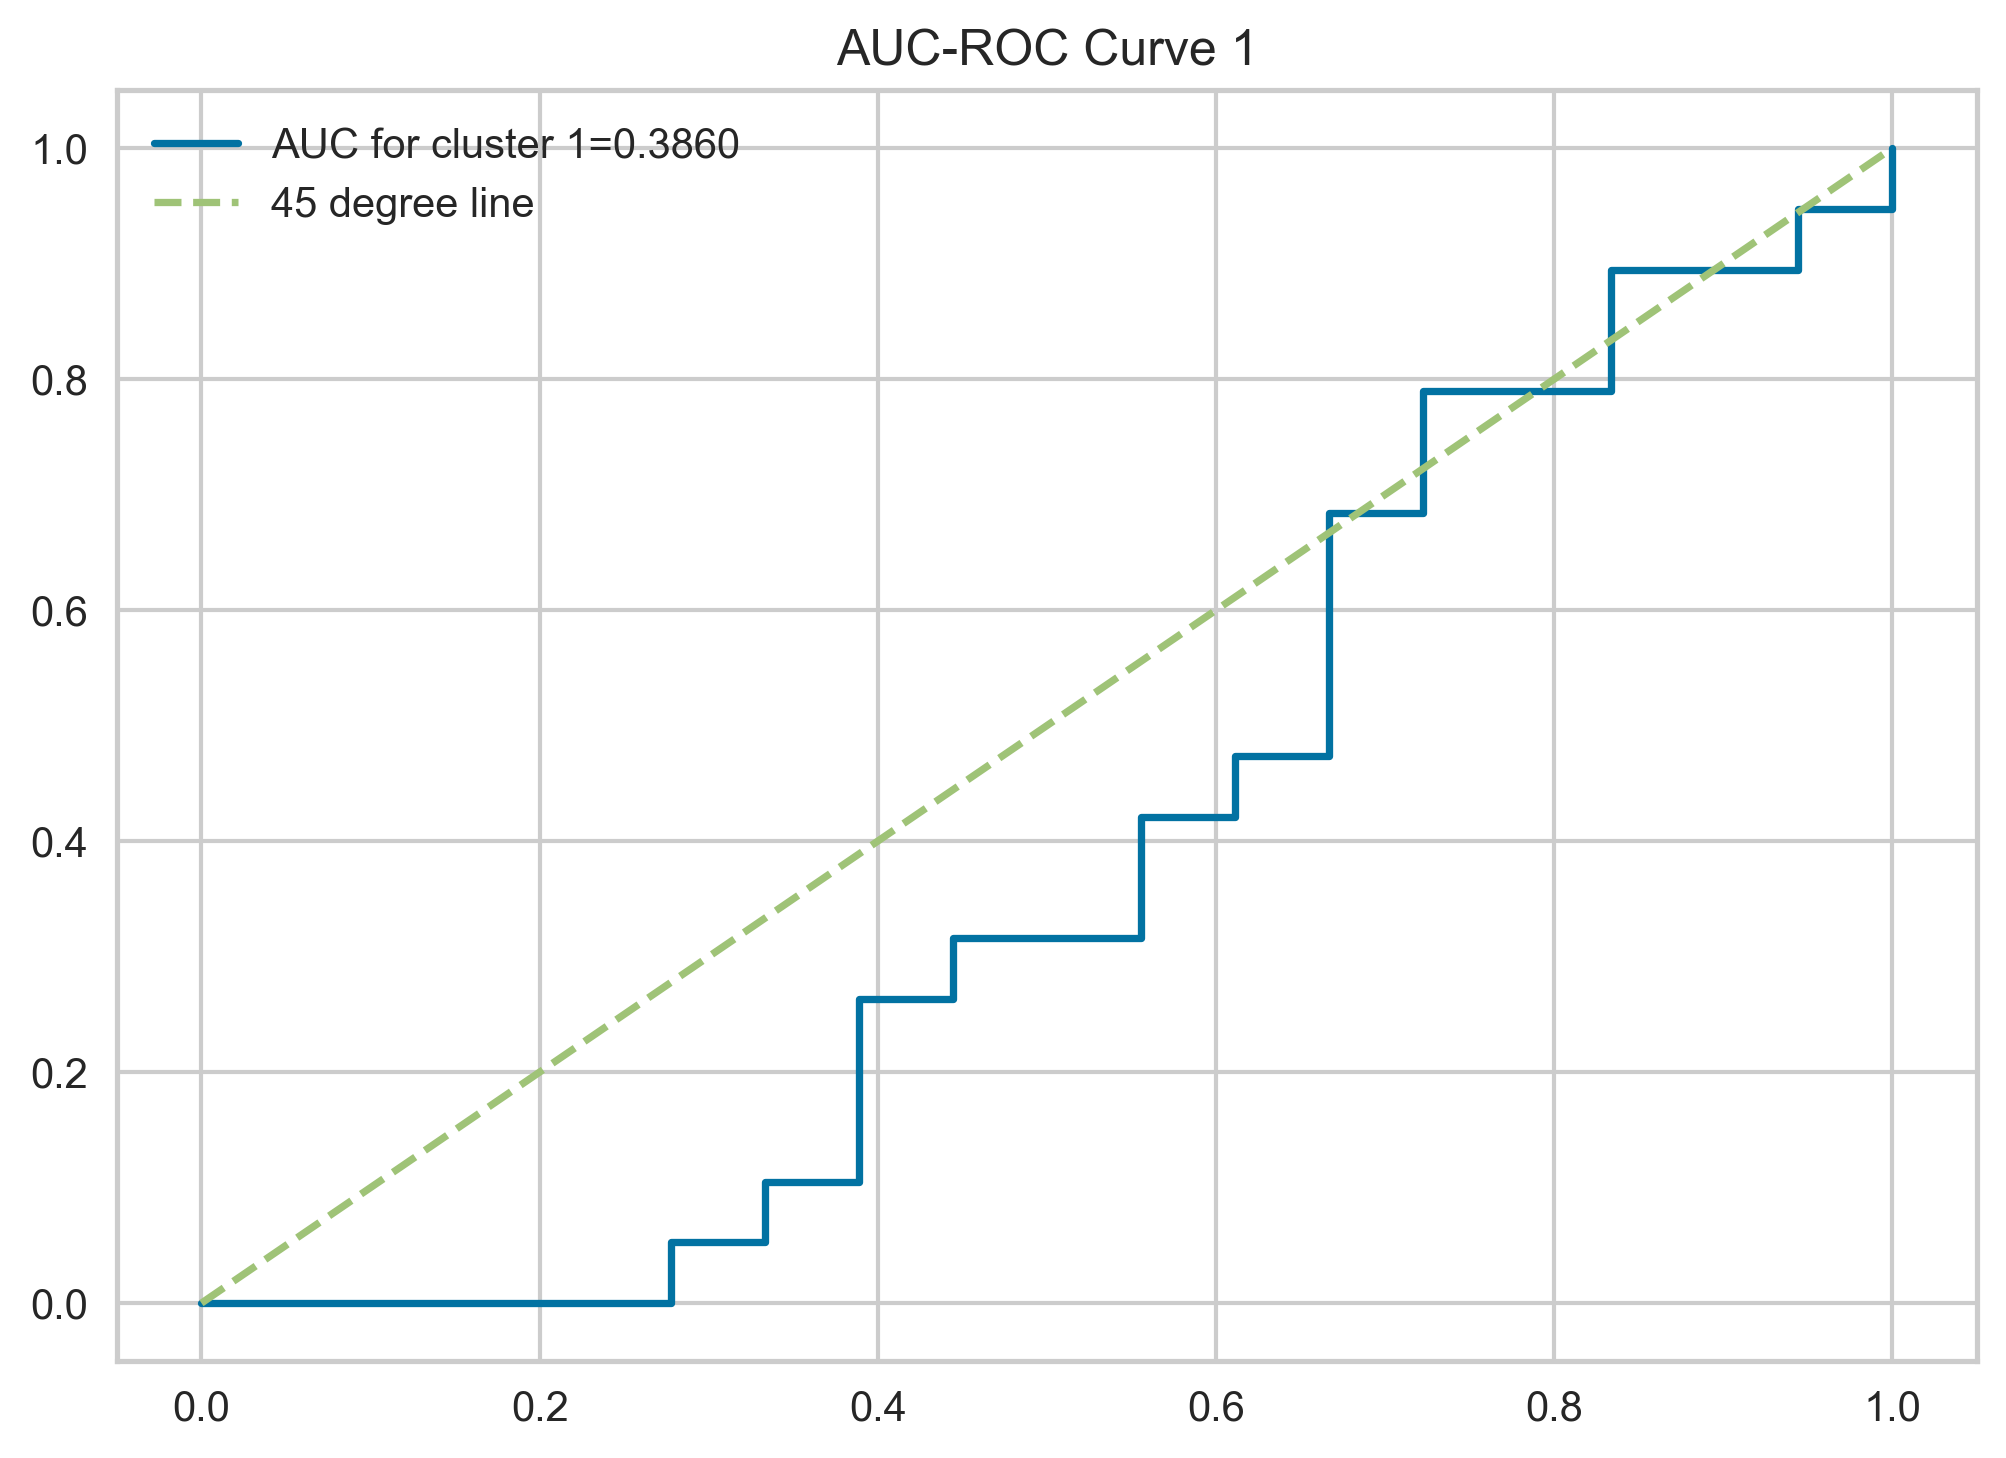

In [41]:
false_pos, true_pos, _ = roc_curve(y_test1.values,  pred_prob1)
auc = roc_auc_score(y_test1, pred_prob1)
plt.plot(false_pos,true_pos, label="AUC for cluster 1={:.4f} "
         .format(auc))
plt.plot([0, 1], [0, 1], linestyle = '--', label='45 degree line')
plt.legend(loc='best')
plt.title('AUC-ROC Curve 1')
plt.show()

In [42]:
X_train2 = second_cluster_train
y_train2 = y_train[y_train.Clusters == 1]['Risk']
logit = sm.Logit(y_train2, X_train2)
logit_fit2 = logit.fit()
print(logit_fit2.summary())

Optimization terminated successfully.
         Current function value: 0.595708
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   Risk   No. Observations:                  593
Model:                          Logit   Df Residuals:                      589
Method:                           MLE   Df Model:                            3
Date:                Sat, 19 Oct 2024   Pseudo R-squ.:                -0.05332
Time:                        13:18:16   Log-Likelihood:                -353.25
converged:                       True   LL-Null:                       -335.37
Covariance Type:            nonrobust   LLR p-value:                     1.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Age               0.3827      0.099      3.851      0.000       0.188       0.577
Job              -0.

In [43]:
X_test2 = second_cluster_test
y_test2 = y_test[y_test.Clusters == 1]['Risk']
pred_prob2 = logit_fit2.predict(X_test2)

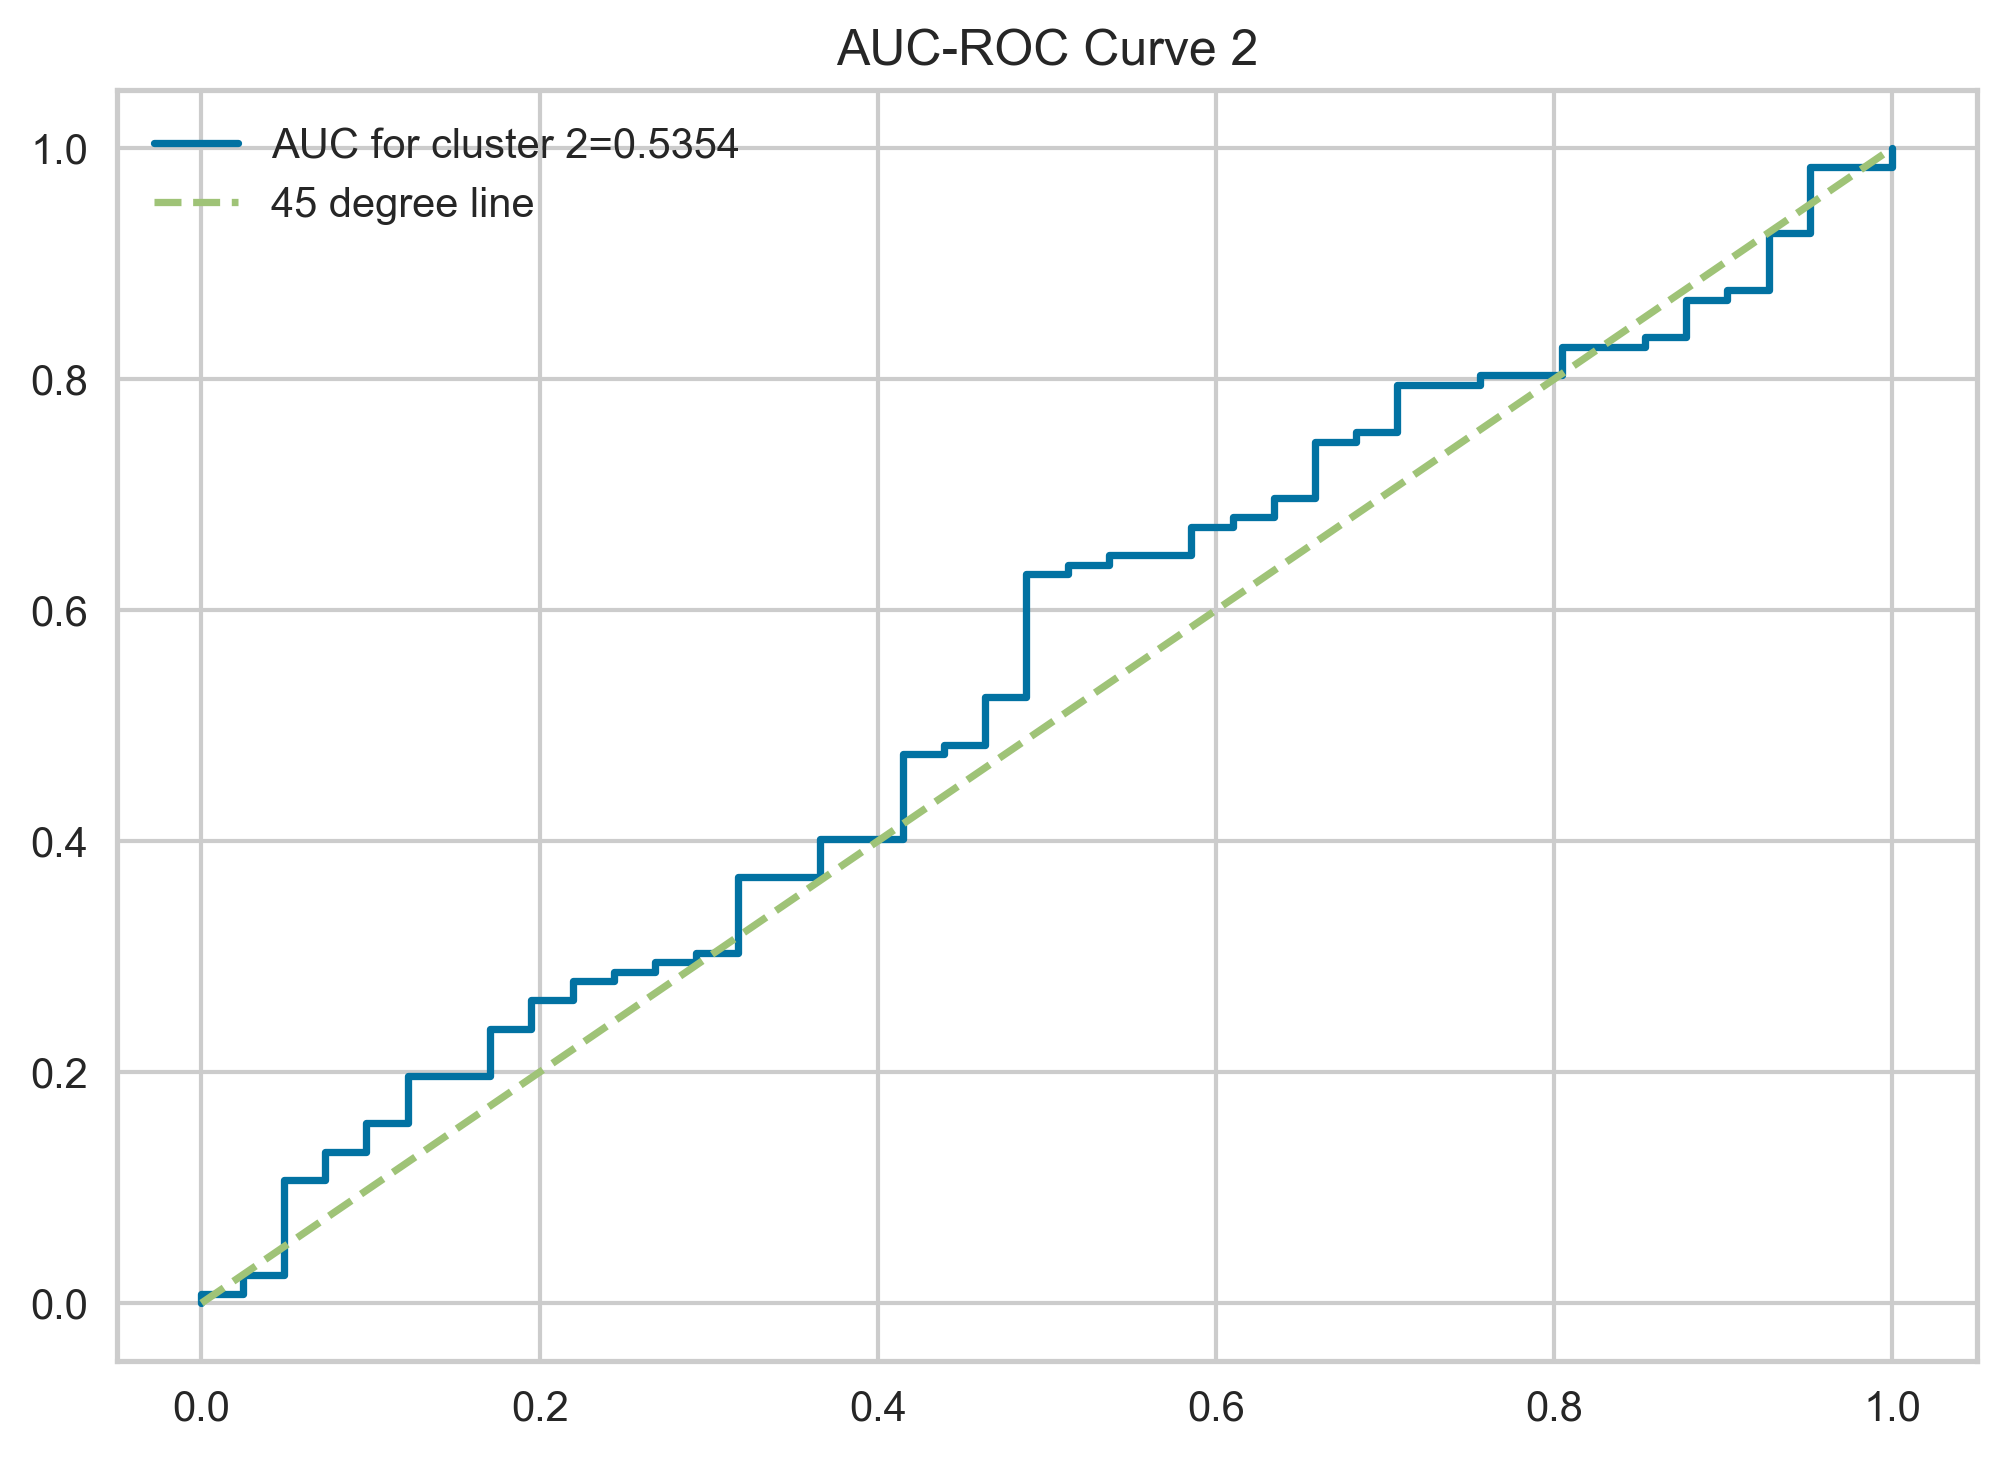

In [44]:
false_pos, true_pos, _ = roc_curve(y_test2.values,  pred_prob2)
auc = roc_auc_score(y_test2, pred_prob2)
plt.plot(false_pos,true_pos,label="AUC for cluster 2={:.4f} "
         .format(auc))
plt.plot([0, 1], [0, 1], linestyle = '--', label='45 degree line')
plt.legend(loc='best')
plt.title('AUC-ROC Curve 2')
plt.show()

## Bayesian Approach for PD Estimation

다음은 베이즈 추정을 위한 파이썬 패키지 PYMC를 이용한 코드이다. 

In [45]:
import pymc as pm 
import arviz as az

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [46]:
with pm.Model() as logistic_model1:   # 이 with - as 구문을 이용하면 파일을 열고 닫는 과정을 자동으로 수행
    beta_age = pm.Normal('coeff_age', mu=0, sigma=10)
    beta_job = pm.Normal('coeff_job', mu=0, sigma=10)
    beta_credit = pm.Normal('coeff_credit_amount', mu=0, sigma=10)
    beta_dur = pm.Normal('coeff_duration', mu=0, sigma=10)
    p = pm.Deterministic('p', pm.math.sigmoid(beta_age * 
                              X_train1['Age'] + beta_job *
                              X_train1['Job'] + beta_credit *
                              X_train1['Credit amount'] + beta_dur *
                              X_train1['Duration']))
with logistic_model1:
    observed = pm.Bernoulli("risk", p, observed=y_train1)
    map_estimate = pm.find_MAP()

Output()

In [47]:
param_list = ['coeff_age', 'coeff_job',
              'coeff_credit_amount', 'coeff_duration']
params = {}
for i in param_list:
    params[i] = [np.round(map_estimate[i], 6)] 
    
bayesian_params = pd.DataFrame.from_dict(params)    
print('The result of Bayesian estimation:\n {}'.format(bayesian_params))

The result of Bayesian estimation:
    coeff_age  coeff_job  coeff_credit_amount  coeff_duration
0   0.576853  -0.135004            -0.251642        0.505083


In [48]:
with pm.Model() as logistic_model2:
    beta_age = pm.Normal('coeff_age', mu=0, sigma=10)
    beta_job = pm.Normal('coeff_job', mu=0, sigma=10)
    beta_credit = pm.Normal('coeff_credit_amount', mu=0, sigma=10)
    beta_dur = pm.Normal('coeff_duration', mu=0, sigma=10)
    p = pm.Deterministic('p', pm.math.sigmoid(beta_age *
                              second_cluster_train['Age'] + 
                              beta_job * second_cluster_train['Job'] + 
                              beta_credit * second_cluster_train['Credit amount'] + 
                              beta_dur * second_cluster_train['Duration']))
with logistic_model2:
    observed = pm.Bernoulli("risk", p,
                            observed=y_train[y_train.Clusters == 1]
                            ['Risk'])
    map_estimate = pm.find_MAP()

Output()

In [49]:
param_list = [ 'coeff_age', 'coeff_job',
              'coeff_credit_amount', 'coeff_duration']
params = {}
for i in param_list:
    params[i] = [np.round(map_estimate[i], 6)]
    
bayesian_params = pd.DataFrame.from_dict(params)    
print('The result of Bayesian estimation:\n {}'.format(bayesian_params))

The result of Bayesian estimation:
    coeff_age  coeff_job  coeff_credit_amount  coeff_duration
0   0.382652  -0.061054            -0.666963       -0.876096


## Markov Chain for PD Estimation

In [50]:
import logging
logger = logging.getLogger('pymc3')
logger.setLevel(logging.ERROR)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [coeff_age]
>Metropolis: [coeff_job]
>Metropolis: [coeff_credit_amount]
>Metropolis: [coeff_duration]
Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 219 seconds.


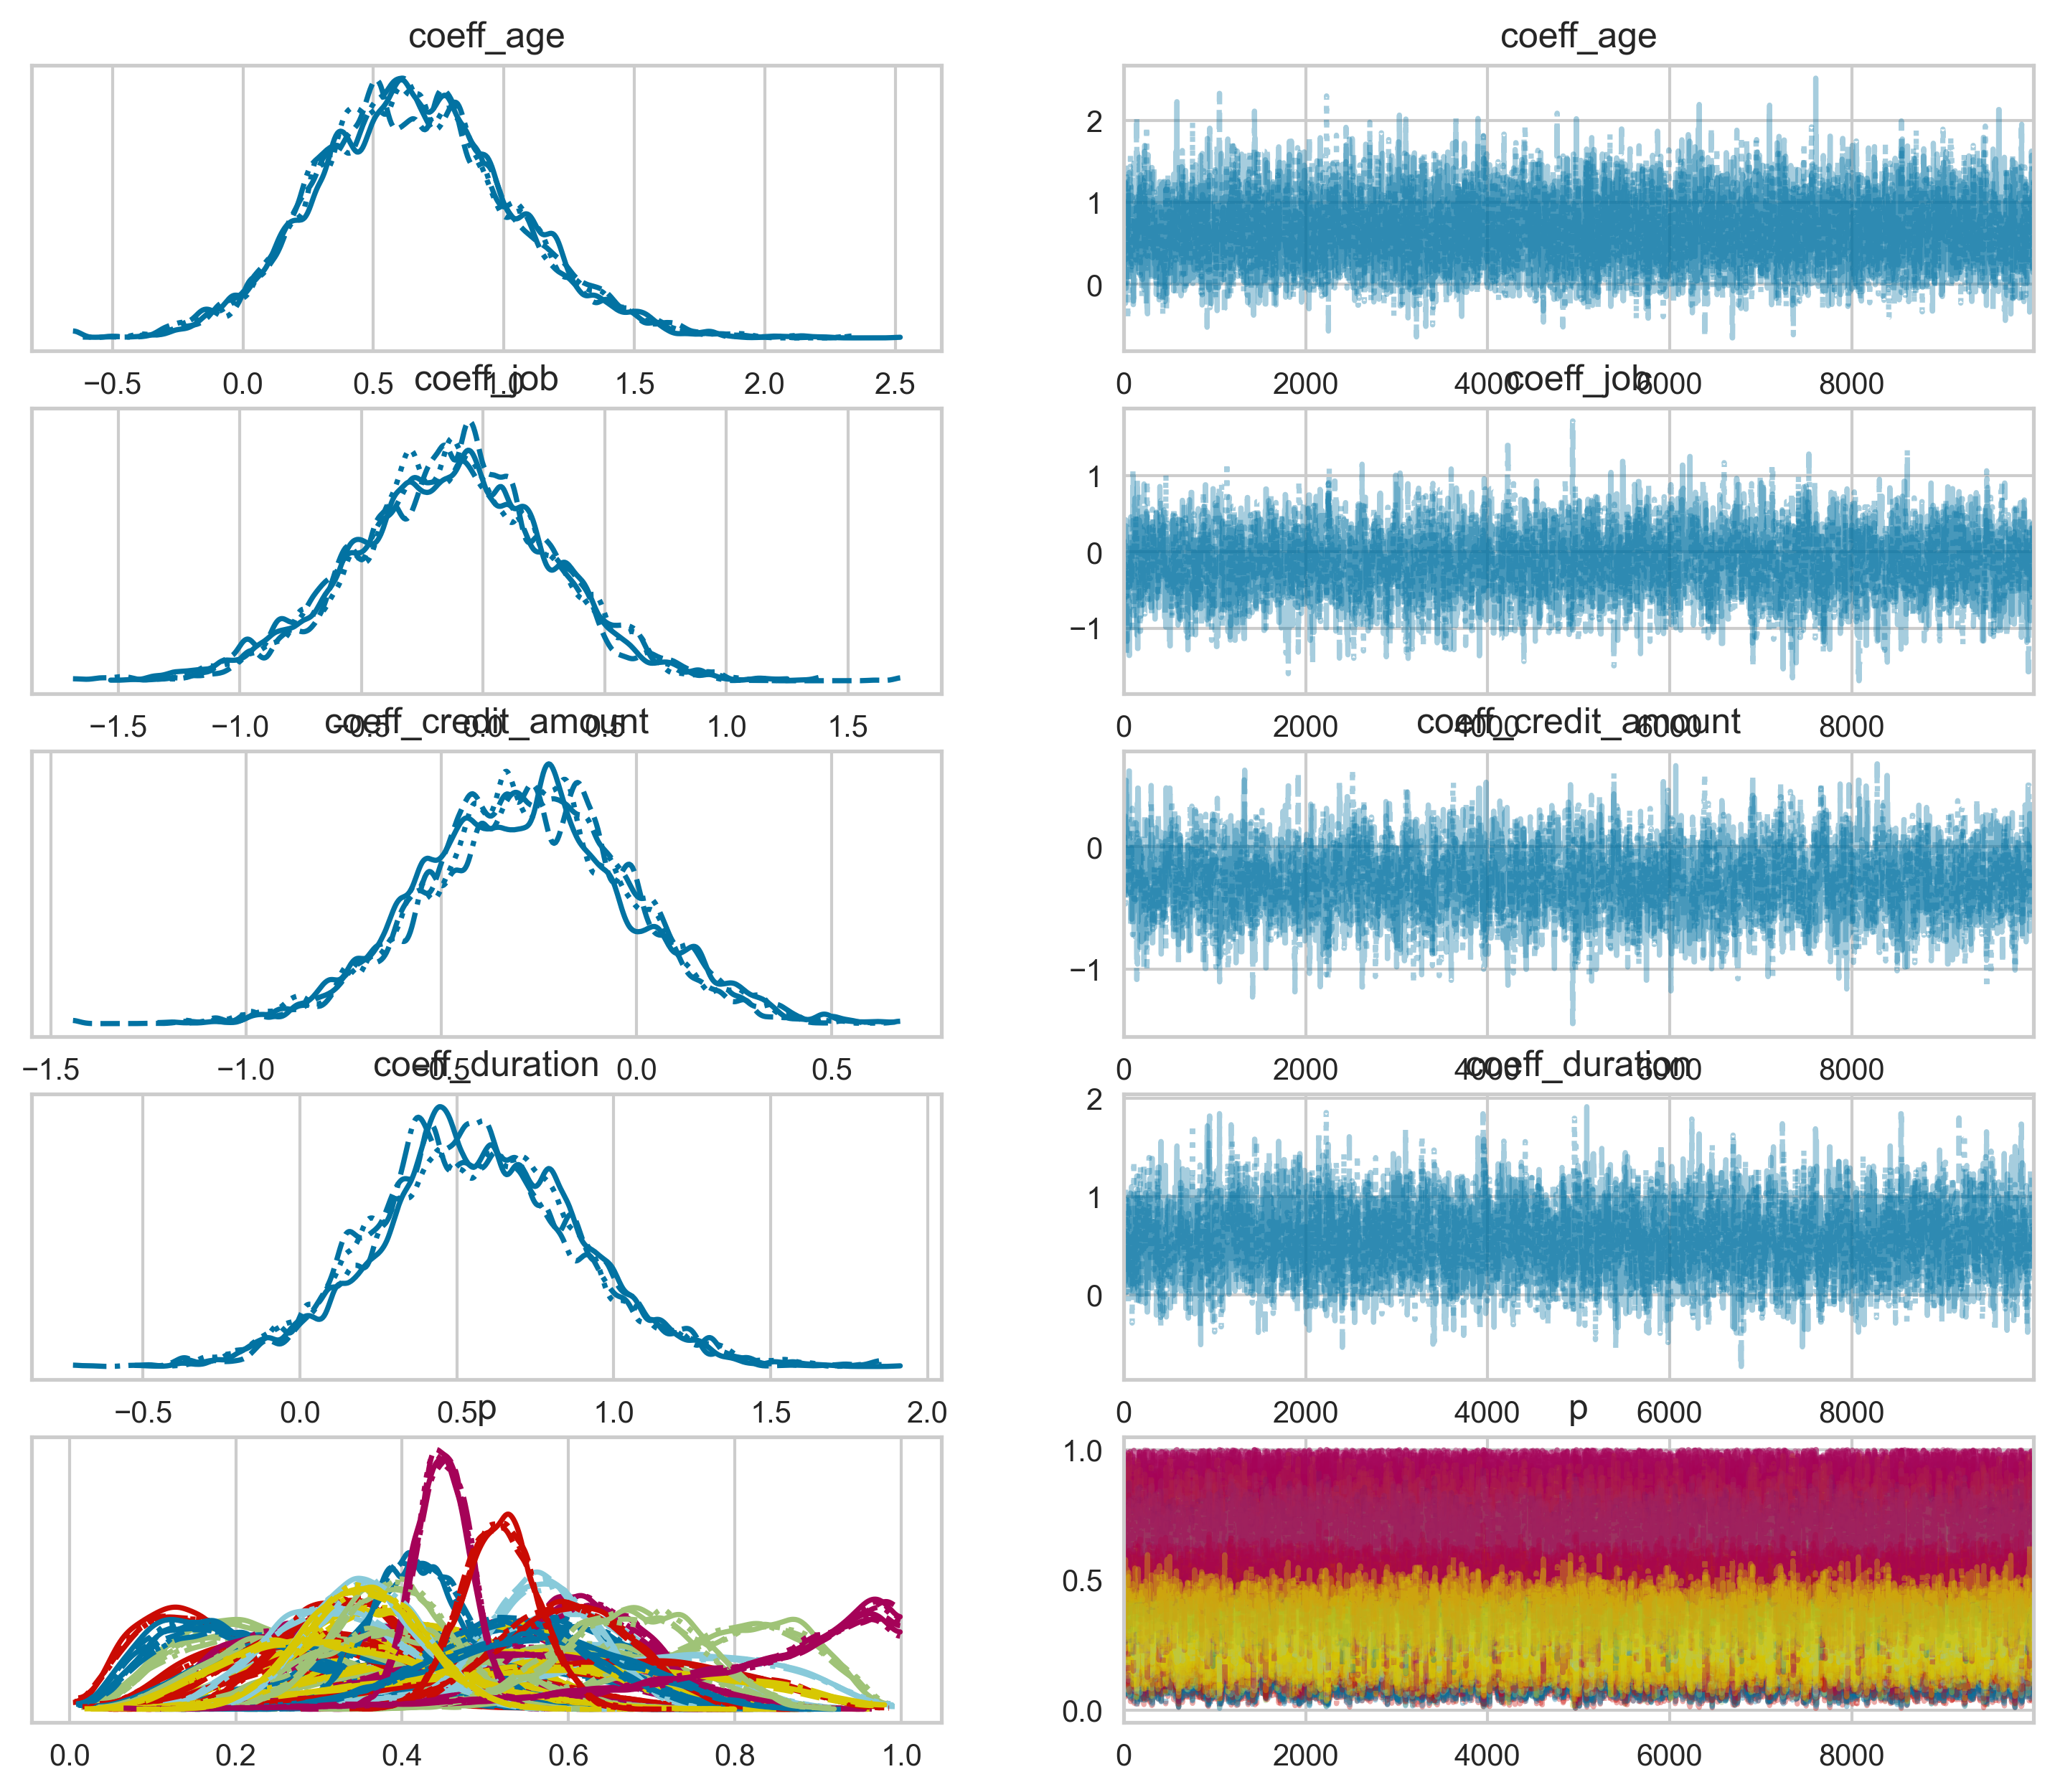

In [51]:
with logistic_model1:
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step,progressbar = False)
az.plot_trace(trace)
plt.show()

In [52]:
with logistic_model1:
    display(az.summary(trace, round_to=6)[:4])

mean        sd    hdi_3%   hdi_97%  mcse_mean  \
coeff_age            0.655547  0.375002 -0.000167  1.411196   0.005210   
coeff_job           -0.135857  0.399588 -0.881575  0.625725   0.008632   
coeff_credit_amount -0.279913  0.263328 -0.766650  0.223101   0.006041   
coeff_duration       0.560718  0.324604 -0.044700  1.192392   0.005906   

                      mcse_sd     ess_bulk     ess_tail     r_hat  
coeff_age            0.003684  5167.289857  6696.126371  1.000930  
coeff_job            0.006105  2142.376060  3785.276767  1.001206  
coeff_credit_amount  0.004272  1898.063562  3309.016091  1.001849  
coeff_duration       0.004177  3026.517274  4491.324090  1.002028

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [coeff_age]
>Metropolis: [coeff_job]
>Metropolis: [coeff_credit_amount]
>Metropolis: [coeff_duration]
Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 1882 seconds.


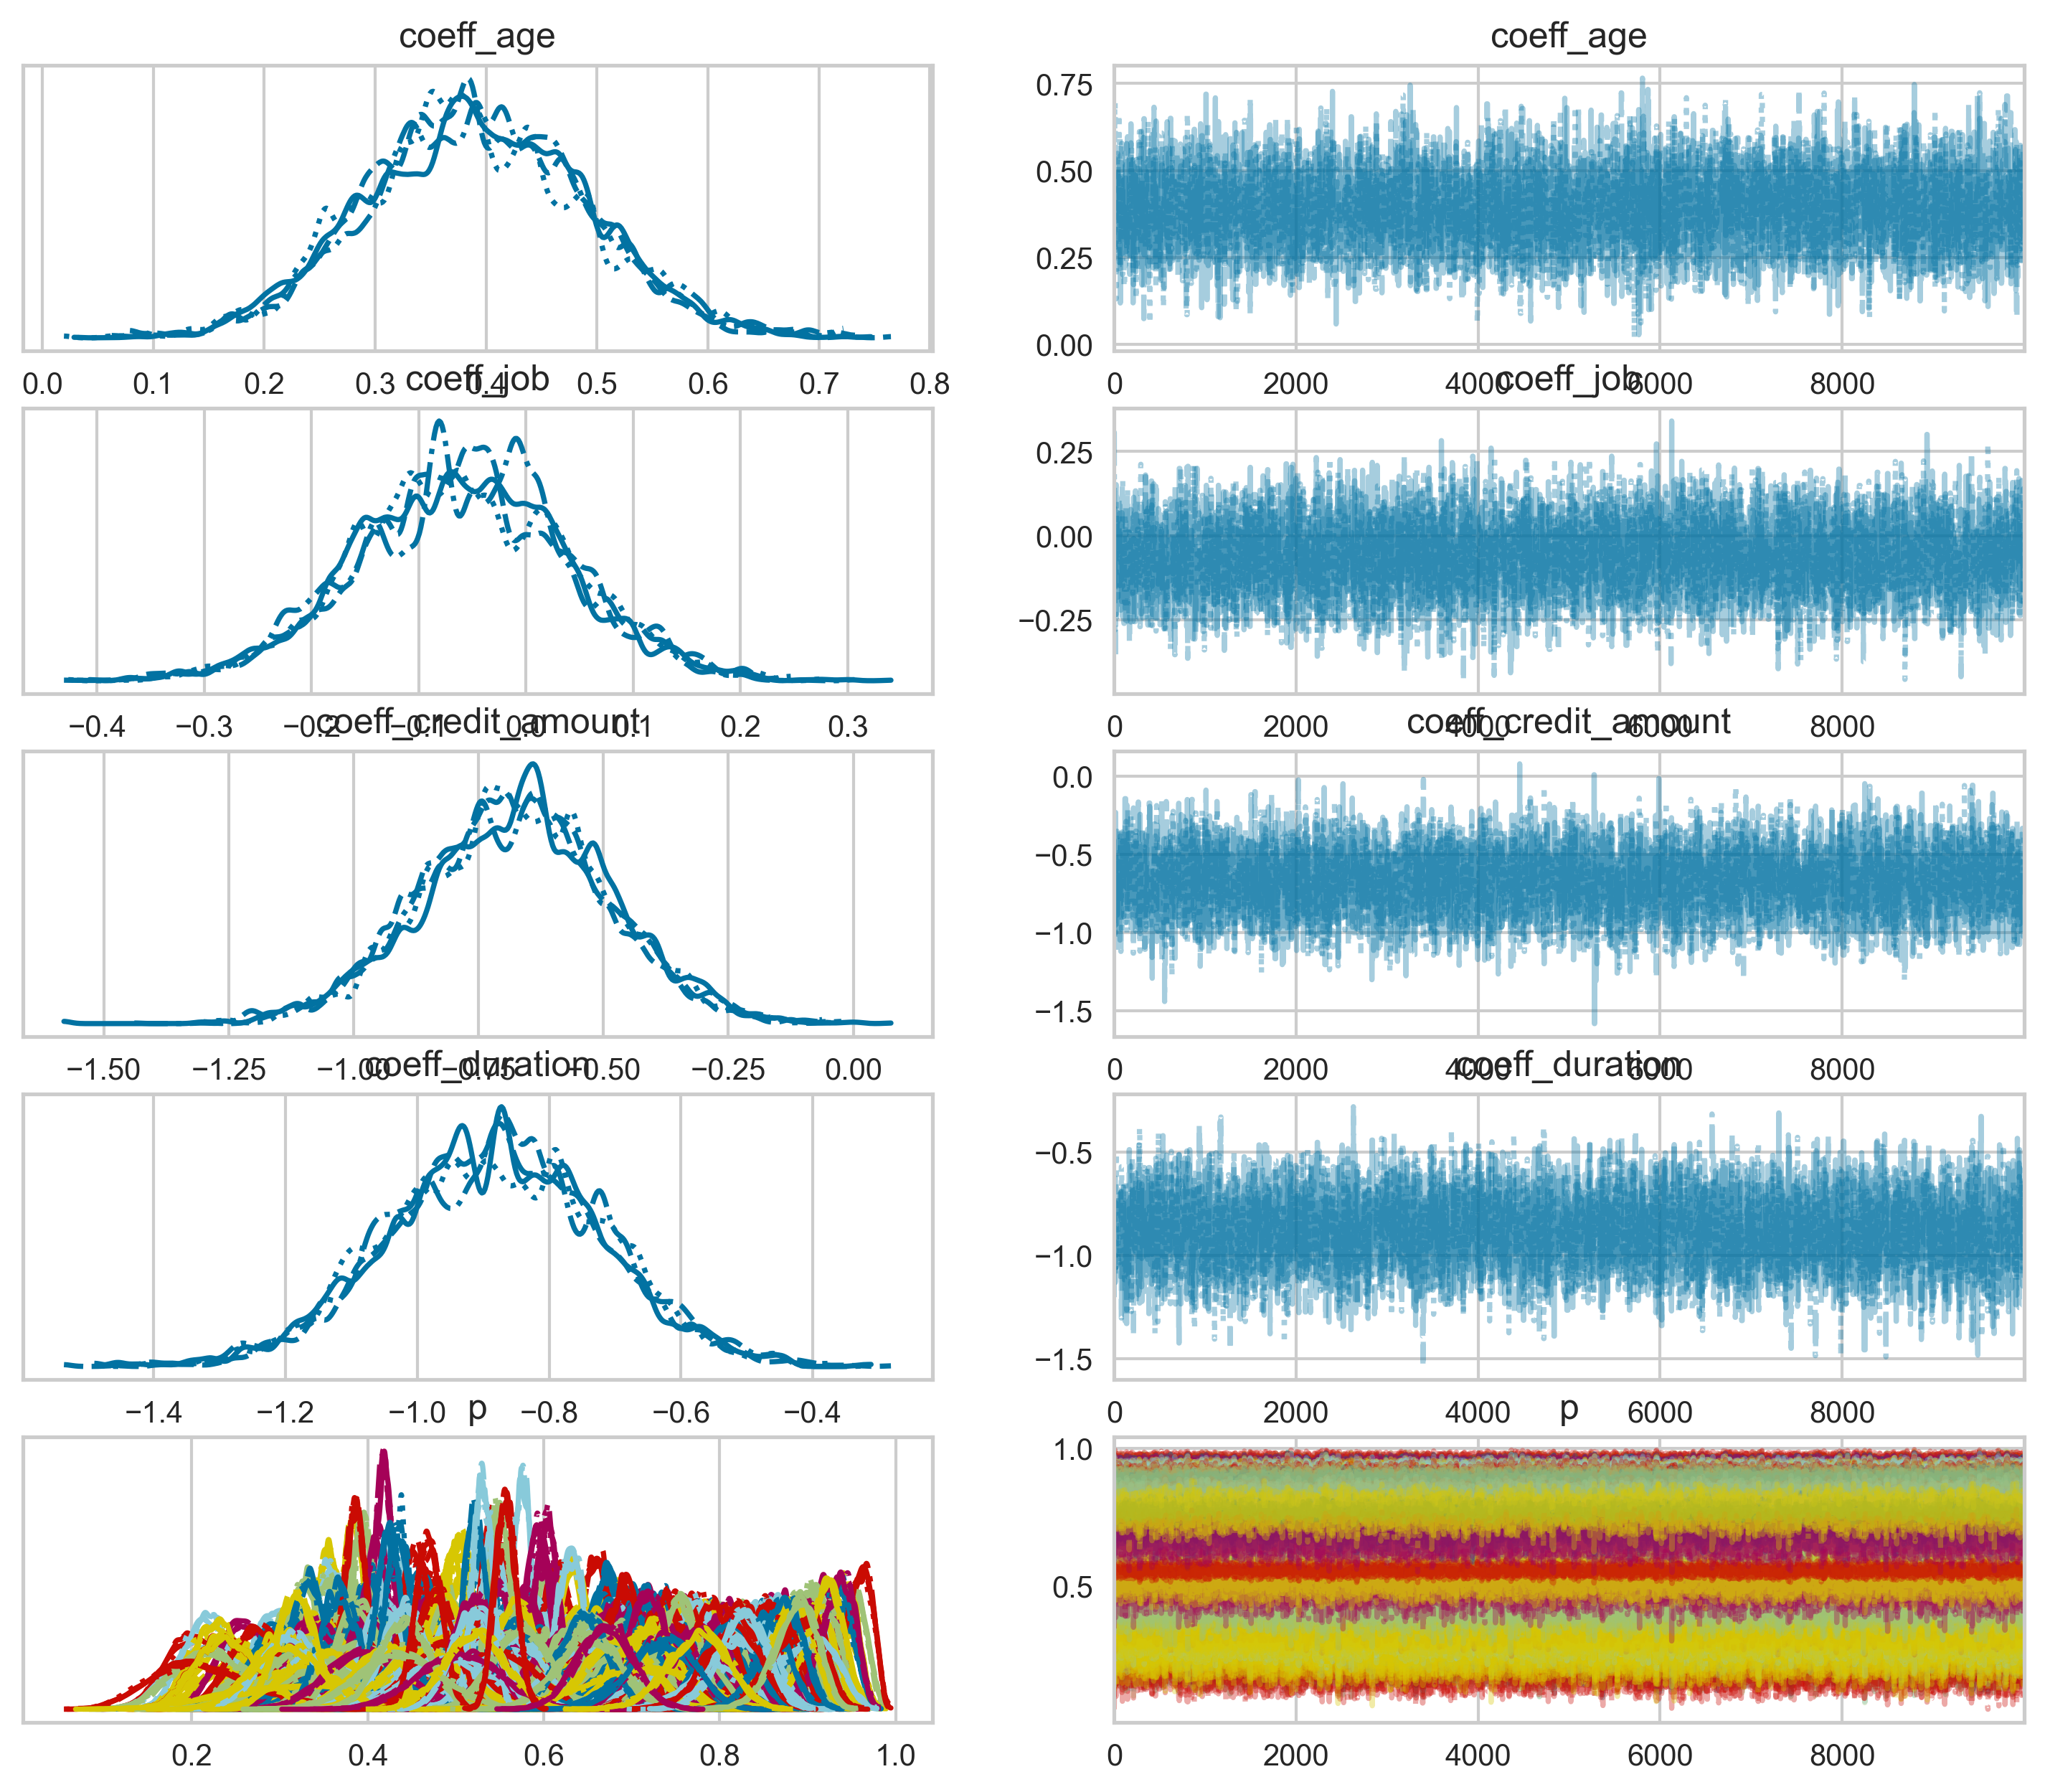

In [53]:
with logistic_model2:
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step,progressbar = False)
az.plot_trace(trace)
plt.show()

In [54]:
with logistic_model2:
    display(az.summary(trace, round_to=6)[:4])

mean        sd    hdi_3%   hdi_97%  mcse_mean  \
coeff_age            0.390575  0.099477  0.213501  0.583360   0.001363   
coeff_job           -0.059864  0.098236 -0.235948  0.133390   0.001342   
coeff_credit_amount -0.677003  0.187013 -1.031611 -0.327917   0.002923   
coeff_duration      -0.882822  0.163050 -1.181715 -0.573895   0.002580   

                      mcse_sd     ess_bulk     ess_tail     r_hat  
coeff_age            0.000973  5344.400355  5437.246661  1.001717  
coeff_job            0.000979  5361.083740  5975.940998  1.000342  
coeff_credit_amount  0.002067  4090.788440  5536.079871  1.000850  
coeff_duration       0.001831  4004.657423  5806.320409  1.001003

## SVC for PD Estimation

In [55]:
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import time

In [56]:
param_svc = {'gamma': [1e-6, 1e-2],
             'C':[0.001,.09,1,5,10],
             'kernel':('linear','rbf')}

In [57]:
svc = SVC(class_weight='balanced')
halve_SVC = HalvingRandomSearchCV(svc, param_svc, 
                                  scoring = 'roc_auc', n_jobs=-1)
halve_SVC.fit(X_train1, y_train1)
print('Best hyperparameters for first cluster in SVC {} with {}'.
      format(halve_SVC.best_score_, halve_SVC.best_params_))

Best hyperparameters for first cluster in SVC 0.4333333333333334 with {'kernel': 'rbf', 'gamma': 1e-06, 'C': 1}


In [58]:
y_pred_SVC1 = halve_SVC.predict(X_test1)
print('The ROC AUC score of SVC for first cluster is {:.4f}'.
      format(roc_auc_score(y_test1, y_pred_SVC1)))

The ROC AUC score of SVC for first cluster is 0.5000


In [59]:
halve_SVC.fit(X_train2, y_train2)
print('Best hyperparameters for second cluster in SVC {} with {}'.
      format(halve_SVC.best_score_, halve_SVC.best_params_))

Best hyperparameters for second cluster in SVC 0.666380859675304 with {'kernel': 'linear', 'gamma': 1e-06, 'C': 0.09}


In [60]:
y_pred_SVC2 = halve_SVC.predict(X_test2)
print('The ROC AUC score of SVC for first cluster is {:.4f}'.
      format(roc_auc_score(y_test2, y_pred_SVC2)))

The ROC AUC score of SVC for first cluster is 0.5385


## RF for PD Estimation

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rfc = RandomForestClassifier(random_state=42)

In [63]:
param_rfc = {'n_estimators': [100, 300],
    'criterion' :['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3, 4, 5, 6],
    'min_samples_split':[5, 10]}

In [64]:
halve_RF = HalvingRandomSearchCV(rfc, param_rfc,
                                 scoring = 'roc_auc', n_jobs=-1)
halve_RF.fit(X_train1, y_train1)
print('Best hyperparameters for first cluster in RF {} with {}'.
      format(halve_RF.best_score_, halve_RF.best_params_))

Best hyperparameters for first cluster in RF nan with {'n_estimators': 100, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 3, 'criterion': 'gini'}


In [65]:
y_pred_RF1 = halve_RF.predict(X_test1)
print('The ROC AUC score of RF for first cluster is {:.4f}'.
      format(roc_auc_score(y_test1, y_pred_RF1)))

The ROC AUC score of RF for first cluster is 0.6155


In [66]:
halve_RF.fit(X_train2, y_train2)
print('Best hyperparameters for second cluster in RF {} with {}'.
      format(halve_RF.best_score_, halve_RF.best_params_))

Best hyperparameters for second cluster in RF 0.6510444553251821 with {'n_estimators': 300, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 4, 'criterion': 'entropy'}


In [67]:
y_pred_RF2 = halve_RF.predict(X_test2)
print('The ROC AUC score of RF for first cluster is {:.4f}'.
      format(roc_auc_score(y_test2, y_pred_RF2)))

The ROC AUC score of RF for first cluster is 0.5000


## NN for PD Estimation

In [68]:
from sklearn.neural_network import MLPClassifier

In [69]:
param_NN = {"hidden_layer_sizes": [(100, 50), (50, 50), (10, 100)],
            "solver": ["lbfgs", "sgd", "adam"], 
            "learning_rate_init": [0.001, 0.05]}

In [70]:
MLP = MLPClassifier(random_state=42)

In [71]:
param_halve_NN = HalvingRandomSearchCV(MLP, param_NN,
                                       scoring = 'roc_auc')
param_halve_NN.fit(X_train1, y_train1)
print('Best hyperparameters for first cluster in NN are {}'.
      format(param_halve_NN.best_params_))

Best hyperparameters for first cluster in NN are {'solver': 'sgd', 'learning_rate_init': 0.05, 'hidden_layer_sizes': (100, 50)}


In [72]:
y_pred_NN1 = param_halve_NN.predict(X_test1)
print('The ROC AUC score of NN for first cluster is {:.4f}'.
      format(roc_auc_score(y_test1, y_pred_NN1)))

The ROC AUC score of NN for first cluster is 0.5863


In [73]:
param_halve_NN.fit(X_train2, y_train2)
print('Best hyperparameters for first cluster in NN are {}'.
      format(param_halve_NN.best_params_))

Best hyperparameters for first cluster in NN are {'solver': 'adam', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (100, 50)}


In [74]:
y_pred_NN2 = param_halve_NN.predict(X_test2)
print('The ROC AUC score of NN for first cluster is {:.4f}'.
      format(roc_auc_score(y_test2, y_pred_NN2)))

The ROC AUC score of NN for first cluster is 0.5242


## DL for PD Estimation

In [75]:
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)

ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

In [ ]:
def DL_risk(dropout_rate,verbose=0):
    model = keras.Sequential()
    model.add(Dense(128,kernel_initializer='normal', 
        activation = 'relu', input_dim=4))
    model.add(Dense(64, kernel_initializer='normal', 
        activation = 'relu'))
    model.add(Dense(8,kernel_initializer='normal', 
        activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop')
    return model

In [ ]:
parameters = {'batch_size':  [10, 50, 100],
          'epochs':  [50, 100, 150],
             'dropout_rate':[0.2, 0.4]}
model = KerasClassifier(build_fn = DL_risk)
gs = GridSearchCV(estimator = model,
                       param_grid = parameters,
                          scoring = 'roc_auc')

In [ ]:
gs.fit(X_train1, y_train1, verbose=0)
print('Best hyperparameters for first cluster in DL are {}'.
      format(gs.best_params_))

In [ ]:
model = KerasClassifier(build_fn = DL_risk,
                        dropout_rate = gs.best_params_['dropout_rate'],
                        verbose = 0,
                        batch_size = gs.best_params_['batch_size'],
                        epochs = gs.best_params_['epochs'])
model.fit(X_train1, y_train1)
DL_predict1 = model.predict(X_test1)
DL_ROC_AUC = roc_auc_score(y_test1, pd.DataFrame(DL_predict1.flatten()))
print('DL_ROC_AUC is {:.4f}'.format(DL_ROC_AUC))

In [ ]:
gs.fit(X_train2.values, y_train2.values, verbose=0)
print('Best parameters for second cluster in DL are {}'.
      format(gs.best_params_))

In [ ]:
model = KerasClassifier(build_fn = DL_risk,
                        dropout_rate= gs.best_params_['dropout_rate'],
                        verbose = 0,
                        batch_size = gs.best_params_['batch_size'],
                        epochs = gs.best_params_['epochs'])
model.fit(X_train2, y_train2)
DL_predict2 =  model.predict(X_test2)
DL_ROC_AUC = roc_auc_score(y_test2, DL_predict2.flatten()) 
print('DL_ROC_AUC is {:.4f}'.format(DL_ROC_AUC))